# House price Predictive analysis

In [138]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
df = pd.read_csv("Delhi house data.csv")

In [140]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [141]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [142]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

# Handling Null values

it seems most of the dat points are missing in per_Sqrt feature so it is better to remove that feature. and as far as rest of the missing data is concerned they are just frw points so i going remove thoes points.

<AxesSubplot:>

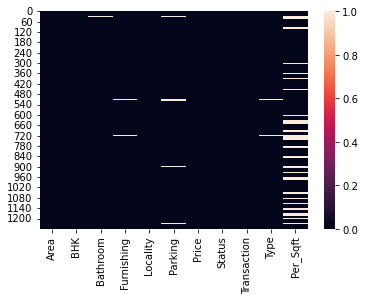

In [143]:
sns.heatmap(df.isnull())

In [144]:
df.drop('Per_Sqft',axis=1,inplace=True)
df.dropna(inplace=True)

<AxesSubplot:>

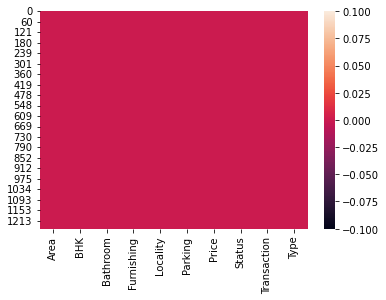

In [145]:
sns.heatmap(df.isnull())

### Anslysisng corrlection between Xn to Yn

Here we could see only Quantitive data which is integer and float other data is a object datatype data(categorical data) so we have to convert object to integer  in order to plot corrlection. 

In [146]:
df.corr()['Price'].sort_values()

Parking    -0.000486
BHK         0.574266
Area        0.579487
Bathroom    0.727533
Price       1.000000
Name: Price, dtype: float64

Text(0.5, 1.0, 'corrlection of fetures respect to Price column')

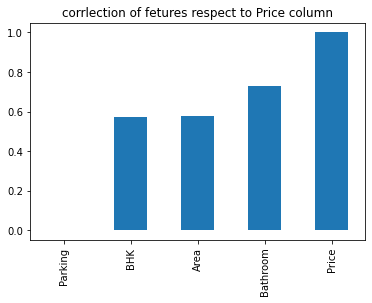

In [147]:
df.corr()['Price'].sort_values().plot(kind='bar')
plt.title('corrlection of fetures respect to Price column')

In [148]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type'],
      dtype='object')

# Feature Enginering + EDA

#### Converting strings to number

In [149]:
df.drop('Locality',axis=1,inplace=True)

In [150]:
obj = df.select_dtypes(include='object')
num = df.select_dtypes(exclude='object')

In [151]:
obj.head()

,Furnishing,Status,Transaction,Type
0,Semi-Furnished,Ready_to_move,New_Property,Builder_Floor
1,Semi-Furnished,Ready_to_move,New_Property,Apartment
2,Furnished,Ready_to_move,Resale,Apartment
3,Semi-Furnished,Ready_to_move,Resale,Builder_Floor
4,Semi-Furnished,Ready_to_move,New_Property,Builder_Floor


In [152]:
num.head()

,Area,BHK,Bathroom,Parking,Price
0,800.0,3,2.0,1.0,6500000
1,750.0,2,2.0,1.0,5000000
2,950.0,2,2.0,1.0,15500000
3,600.0,2,2.0,1.0,4200000
4,650.0,2,2.0,1.0,6200000


In [153]:
obj = pd.get_dummies(obj,drop_first=True)

In [154]:
dff = pd.concat([obj,num],axis=1)

# EDA

<AxesSubplot:>

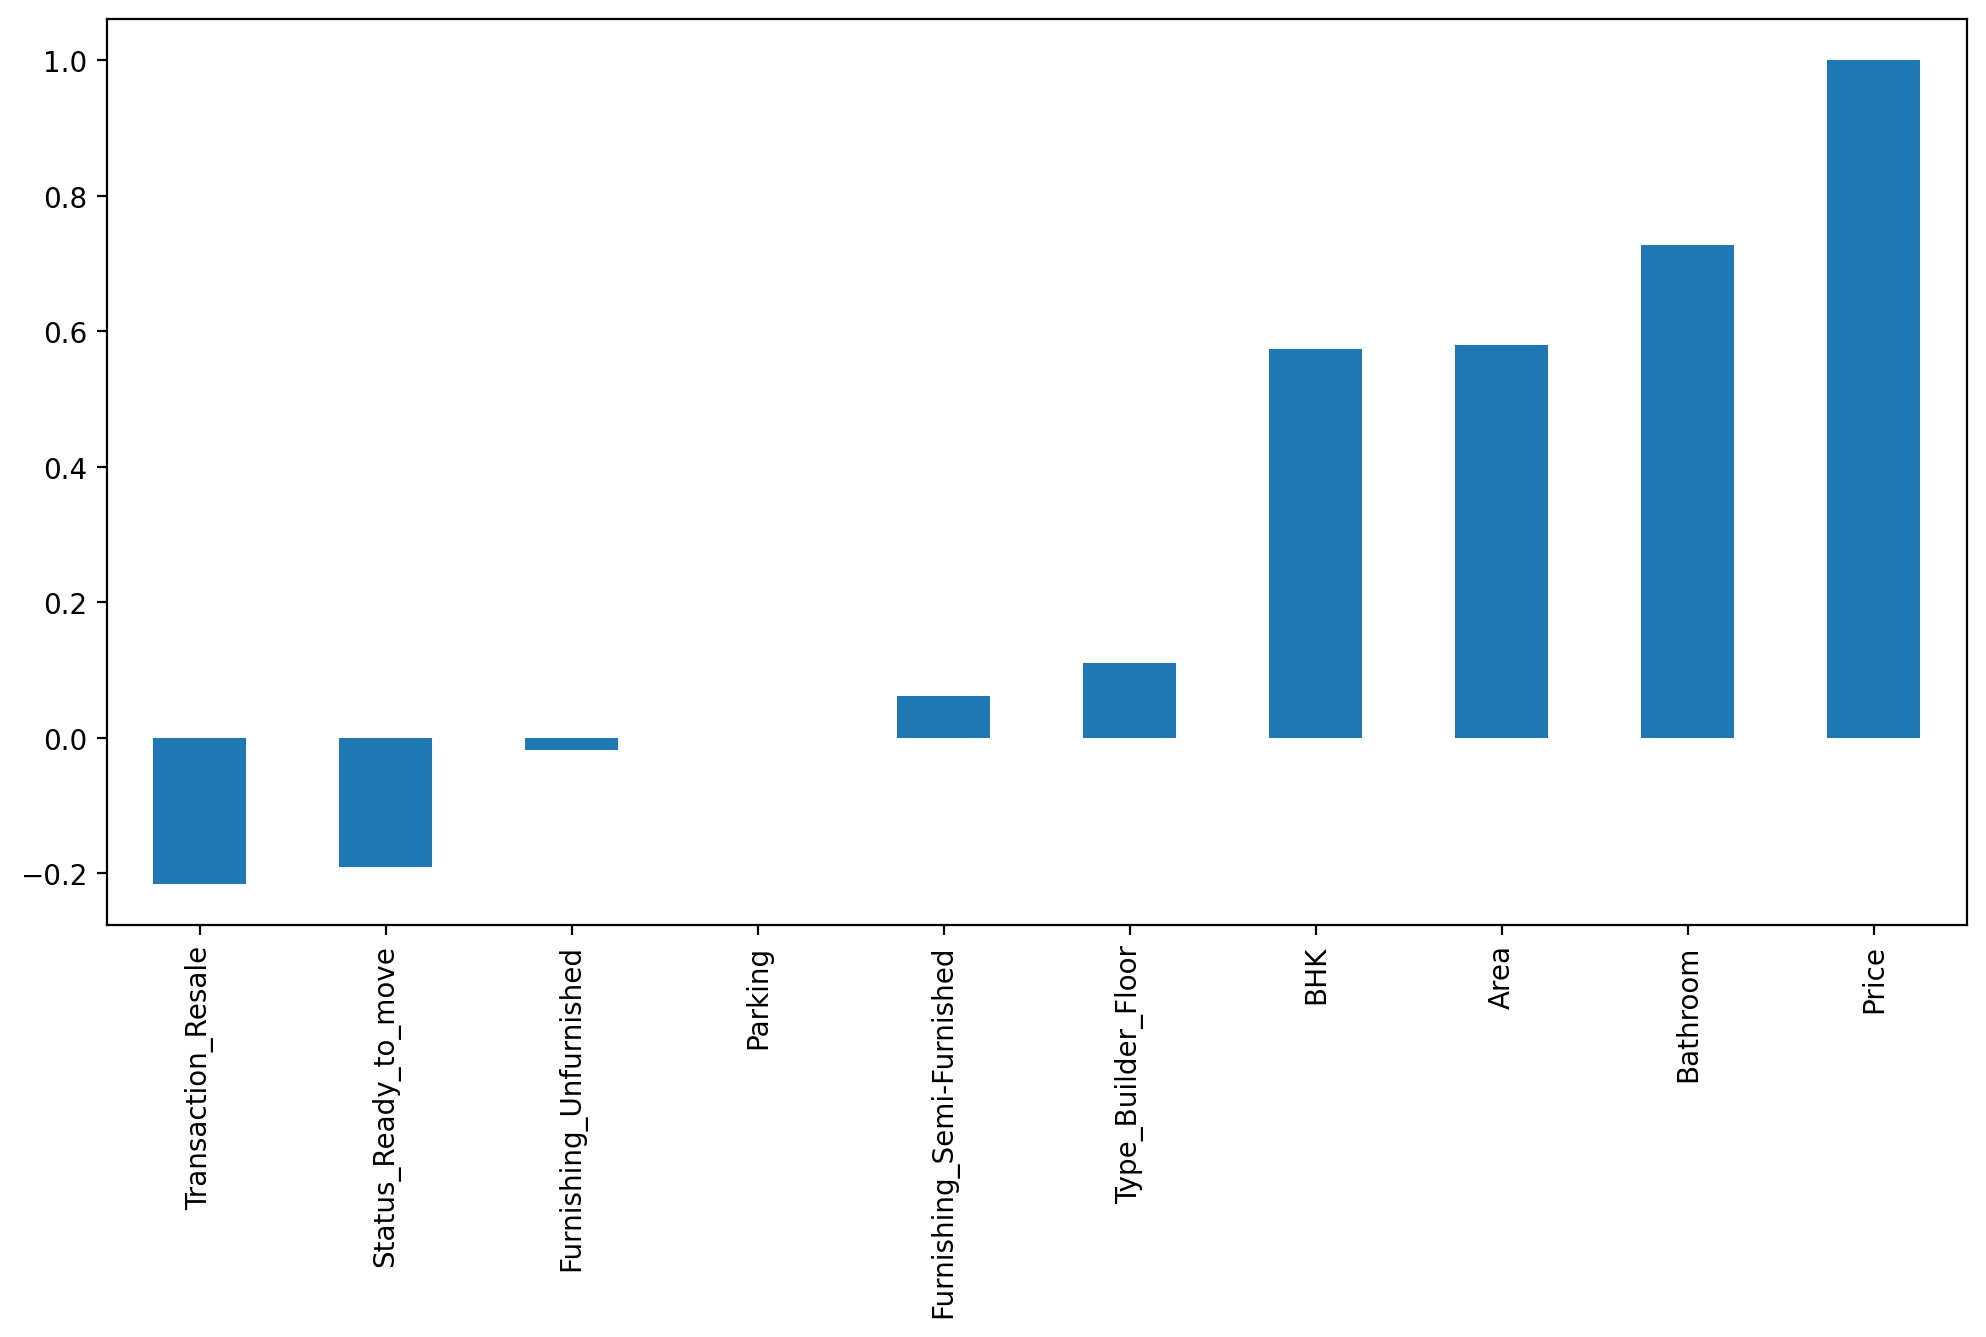

In [155]:
plt.figure(figsize=(12,6),dpi=200)
dff.corr()['Price'].sort_values().plot(kind='bar')

# Analysing Outliers

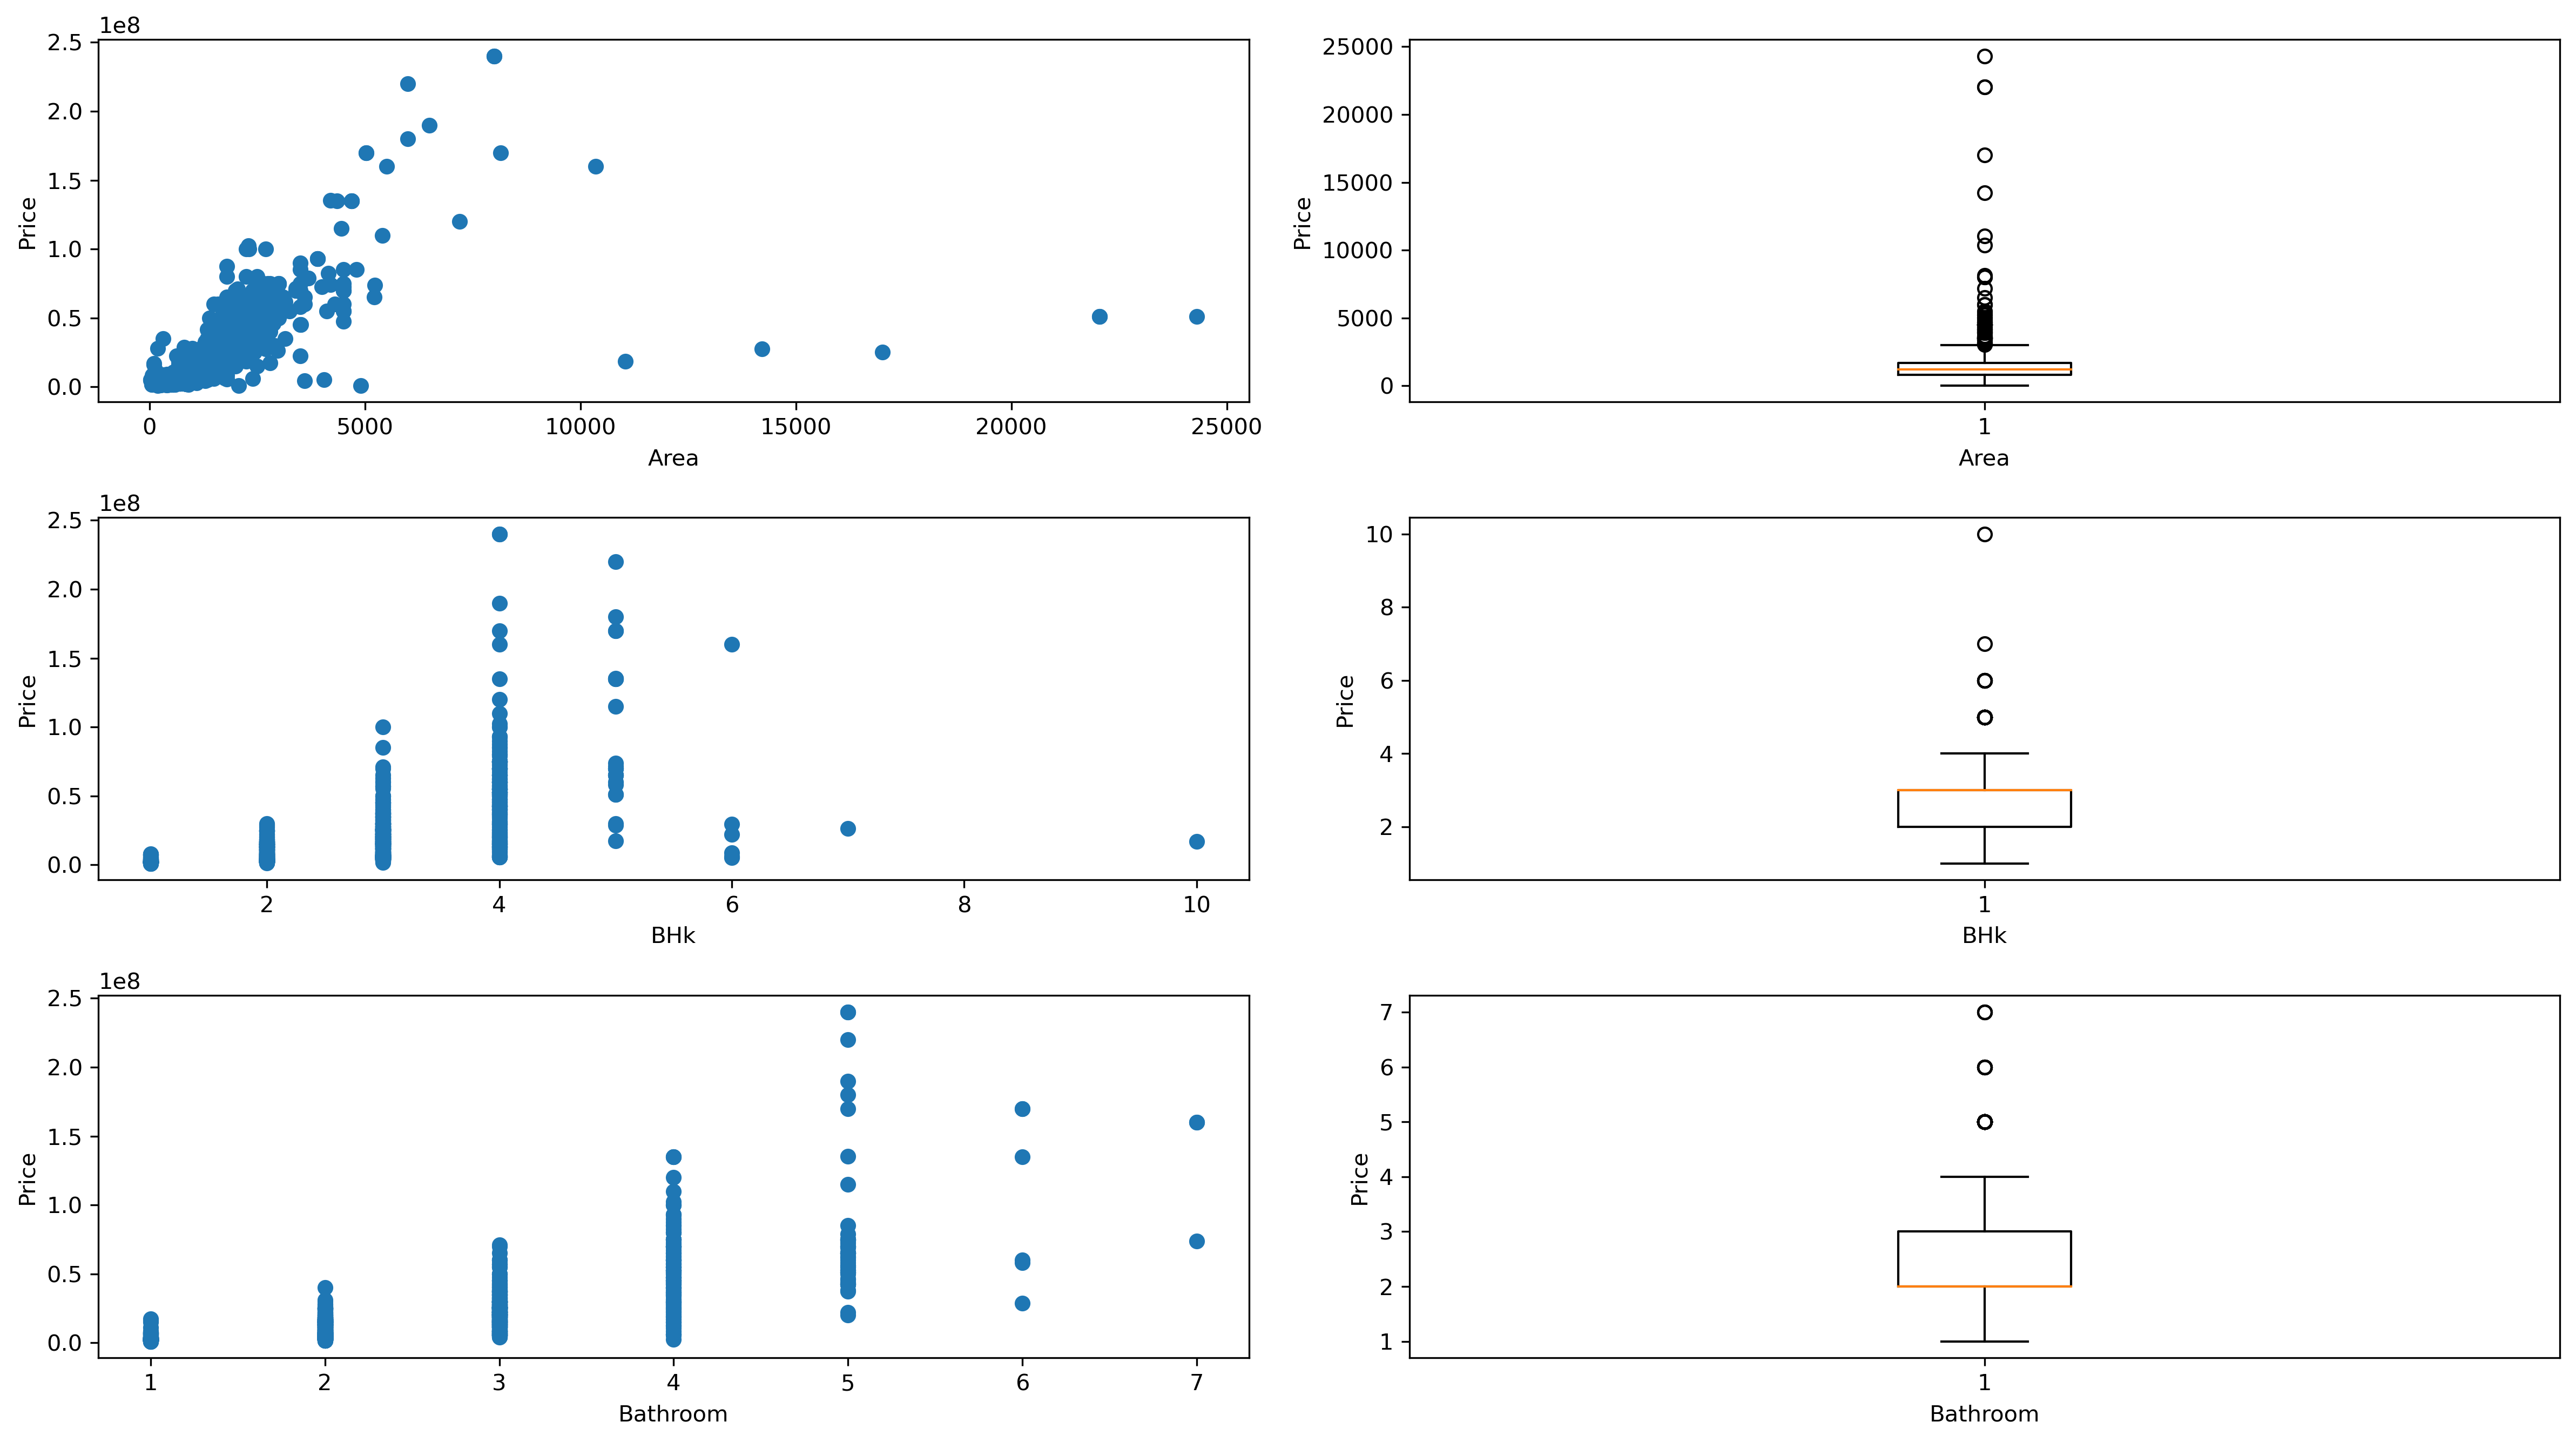

In [156]:
ig , axes = plt.subplots(3,2,figsize=(16,9),dpi=300)


axes[0][0].scatter(dff['Area'],dff['Price'])
axes[0][1].boxplot(dff['Area'])
axes[0][0].set_xlabel('Area')
axes[0][0].set_ylabel('Price')
axes[0][1].set_xlabel('Area')
axes[0][1].set_ylabel('Price')

axes[1][0].scatter(dff['BHK'],dff['Price'])
axes[1][1].boxplot(dff['BHK'])
axes[1][0].set_xlabel('BHk')
axes[1][0].set_ylabel('Price')
axes[1][1].set_xlabel('BHk')
axes[1][1].set_ylabel('Price')


axes[2][0].scatter(dff['Bathroom'],dff['Price'])
axes[2][1].boxplot(dff['Bathroom'])
axes[2][0].set_xlabel('Bathroom')
axes[2][0].set_ylabel('Price')
axes[2][1].set_xlabel('Bathroom')
axes[2][1].set_ylabel('Price')

plt.tight_layout()


BHK         57.4266%

Area        57.9487%

Bathroom    72.7533 %

this is the percentage of corrlection of fetures with respect to Price 

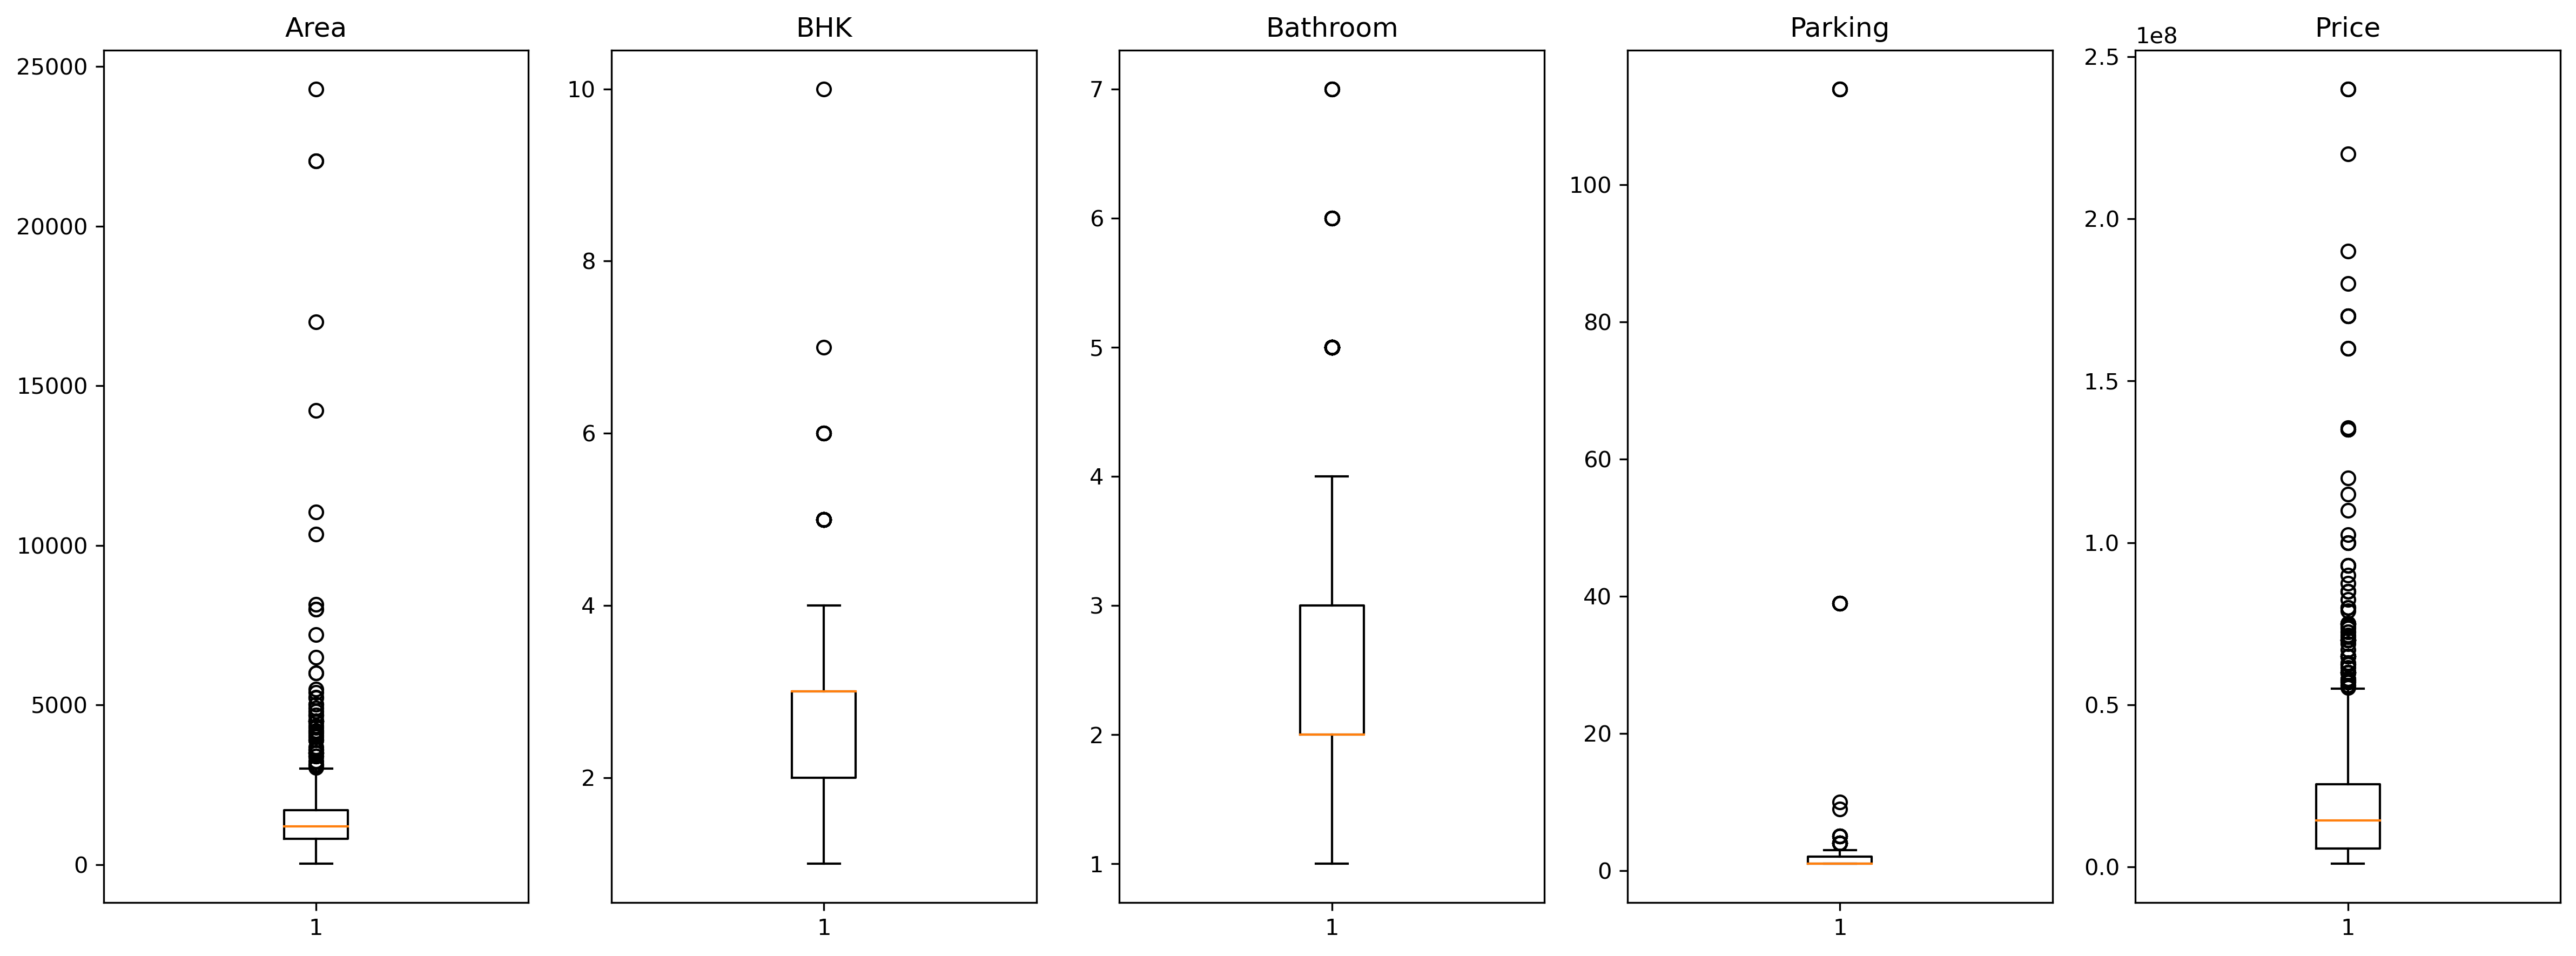

In [157]:
fig , axes = plt.subplots(1,5,figsize=(16,6),dpi=300)
 
axes[0].boxplot(dff['Area'])
axes[0].set_title('Area')
axes[1].boxplot(dff['BHK'])
axes[1].set_title('BHK')
axes[2].boxplot(dff['Bathroom'])
axes[2].set_title('Bathroom')
axes[3].boxplot(dff['Parking'])
axes[3].set_title('Parking')
axes[4].boxplot(dff['Price'])
axes[4].set_title('Price')
 
    
plt.tight_layout()

# Here we can easily see the outliers which definetely skrew our model

here only three features for us which has highest corrlection to the y(price feature)

which are Bathroom, Area, and BHK features

#### Removing outliers from Area feture

In [158]:
dff.drop(dff[dff['Area'] > 9000].index,axis=0,inplace=True)  ## do this 1 

In [166]:
dff.drop(dff[(dff['Area'] > 3000) & (dff['Price'] < 40000000)].index,axis=0,inplace=True) ### do this 2 

In [171]:
dff.drop(dff[dff['Area'] > 7000].index,axis=0,inplace=True)  ## do this 3 

#### Removing outliers from BHK feture

In [159]:
dff.drop(dff[(dff['Price'] > 1000000) & (dff['BHK'] == 6)].index,axis=0,inplace=True)

In [160]:
dff.drop(dff[dff['BHK'] > 6].index,axis=0,inplace=True)

#### Removing outliers from Bathroom feture

In [161]:
dff.drop(dff[(dff['Bathroom'] == 5) & (dff['Price'] > 2000000)].index,axis=0,inplace=True)

<AxesSubplot:>

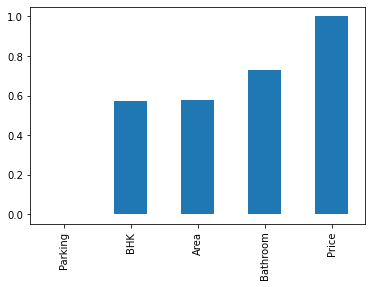

In [178]:
df.corr()['Price'].sort_values().plot(kind='bar')

<AxesSubplot:>

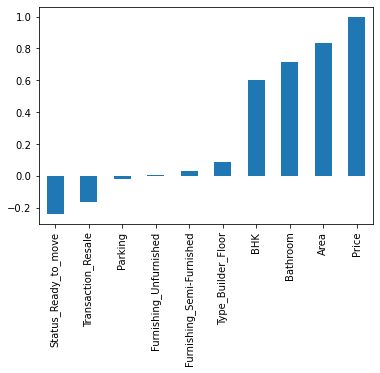

In [179]:
dff.corr()['Price'].sort_values().plot(kind='bar')

In [182]:
df.corr()['Price'].sort_values() 

Parking    -0.000486
BHK         0.574266
Area        0.579487
Bathroom    0.727533
Price       1.000000
Name: Price, dtype: float64

In [183]:
dff.corr()['Price'].sort_values()

Status_Ready_to_move        -0.240886
Transaction_Resale          -0.166692
Parking                     -0.018171
Furnishing_Unfurnished       0.008825
Furnishing_Semi-Furnished    0.028165
Type_Builder_Floor           0.084966
BHK                          0.599326
Bathroom                     0.716358
Area                         0.836486
Price                        1.000000
Name: Price, dtype: float64

### we significantly increased Area feture corrlectaion,

intially it was 57 % after removing outlier now it is 83 % 

Moreover,

BHK 57 % to 59 %

slightely deminished in bathroom feture by 72% to 71 % it is not a big Deal though


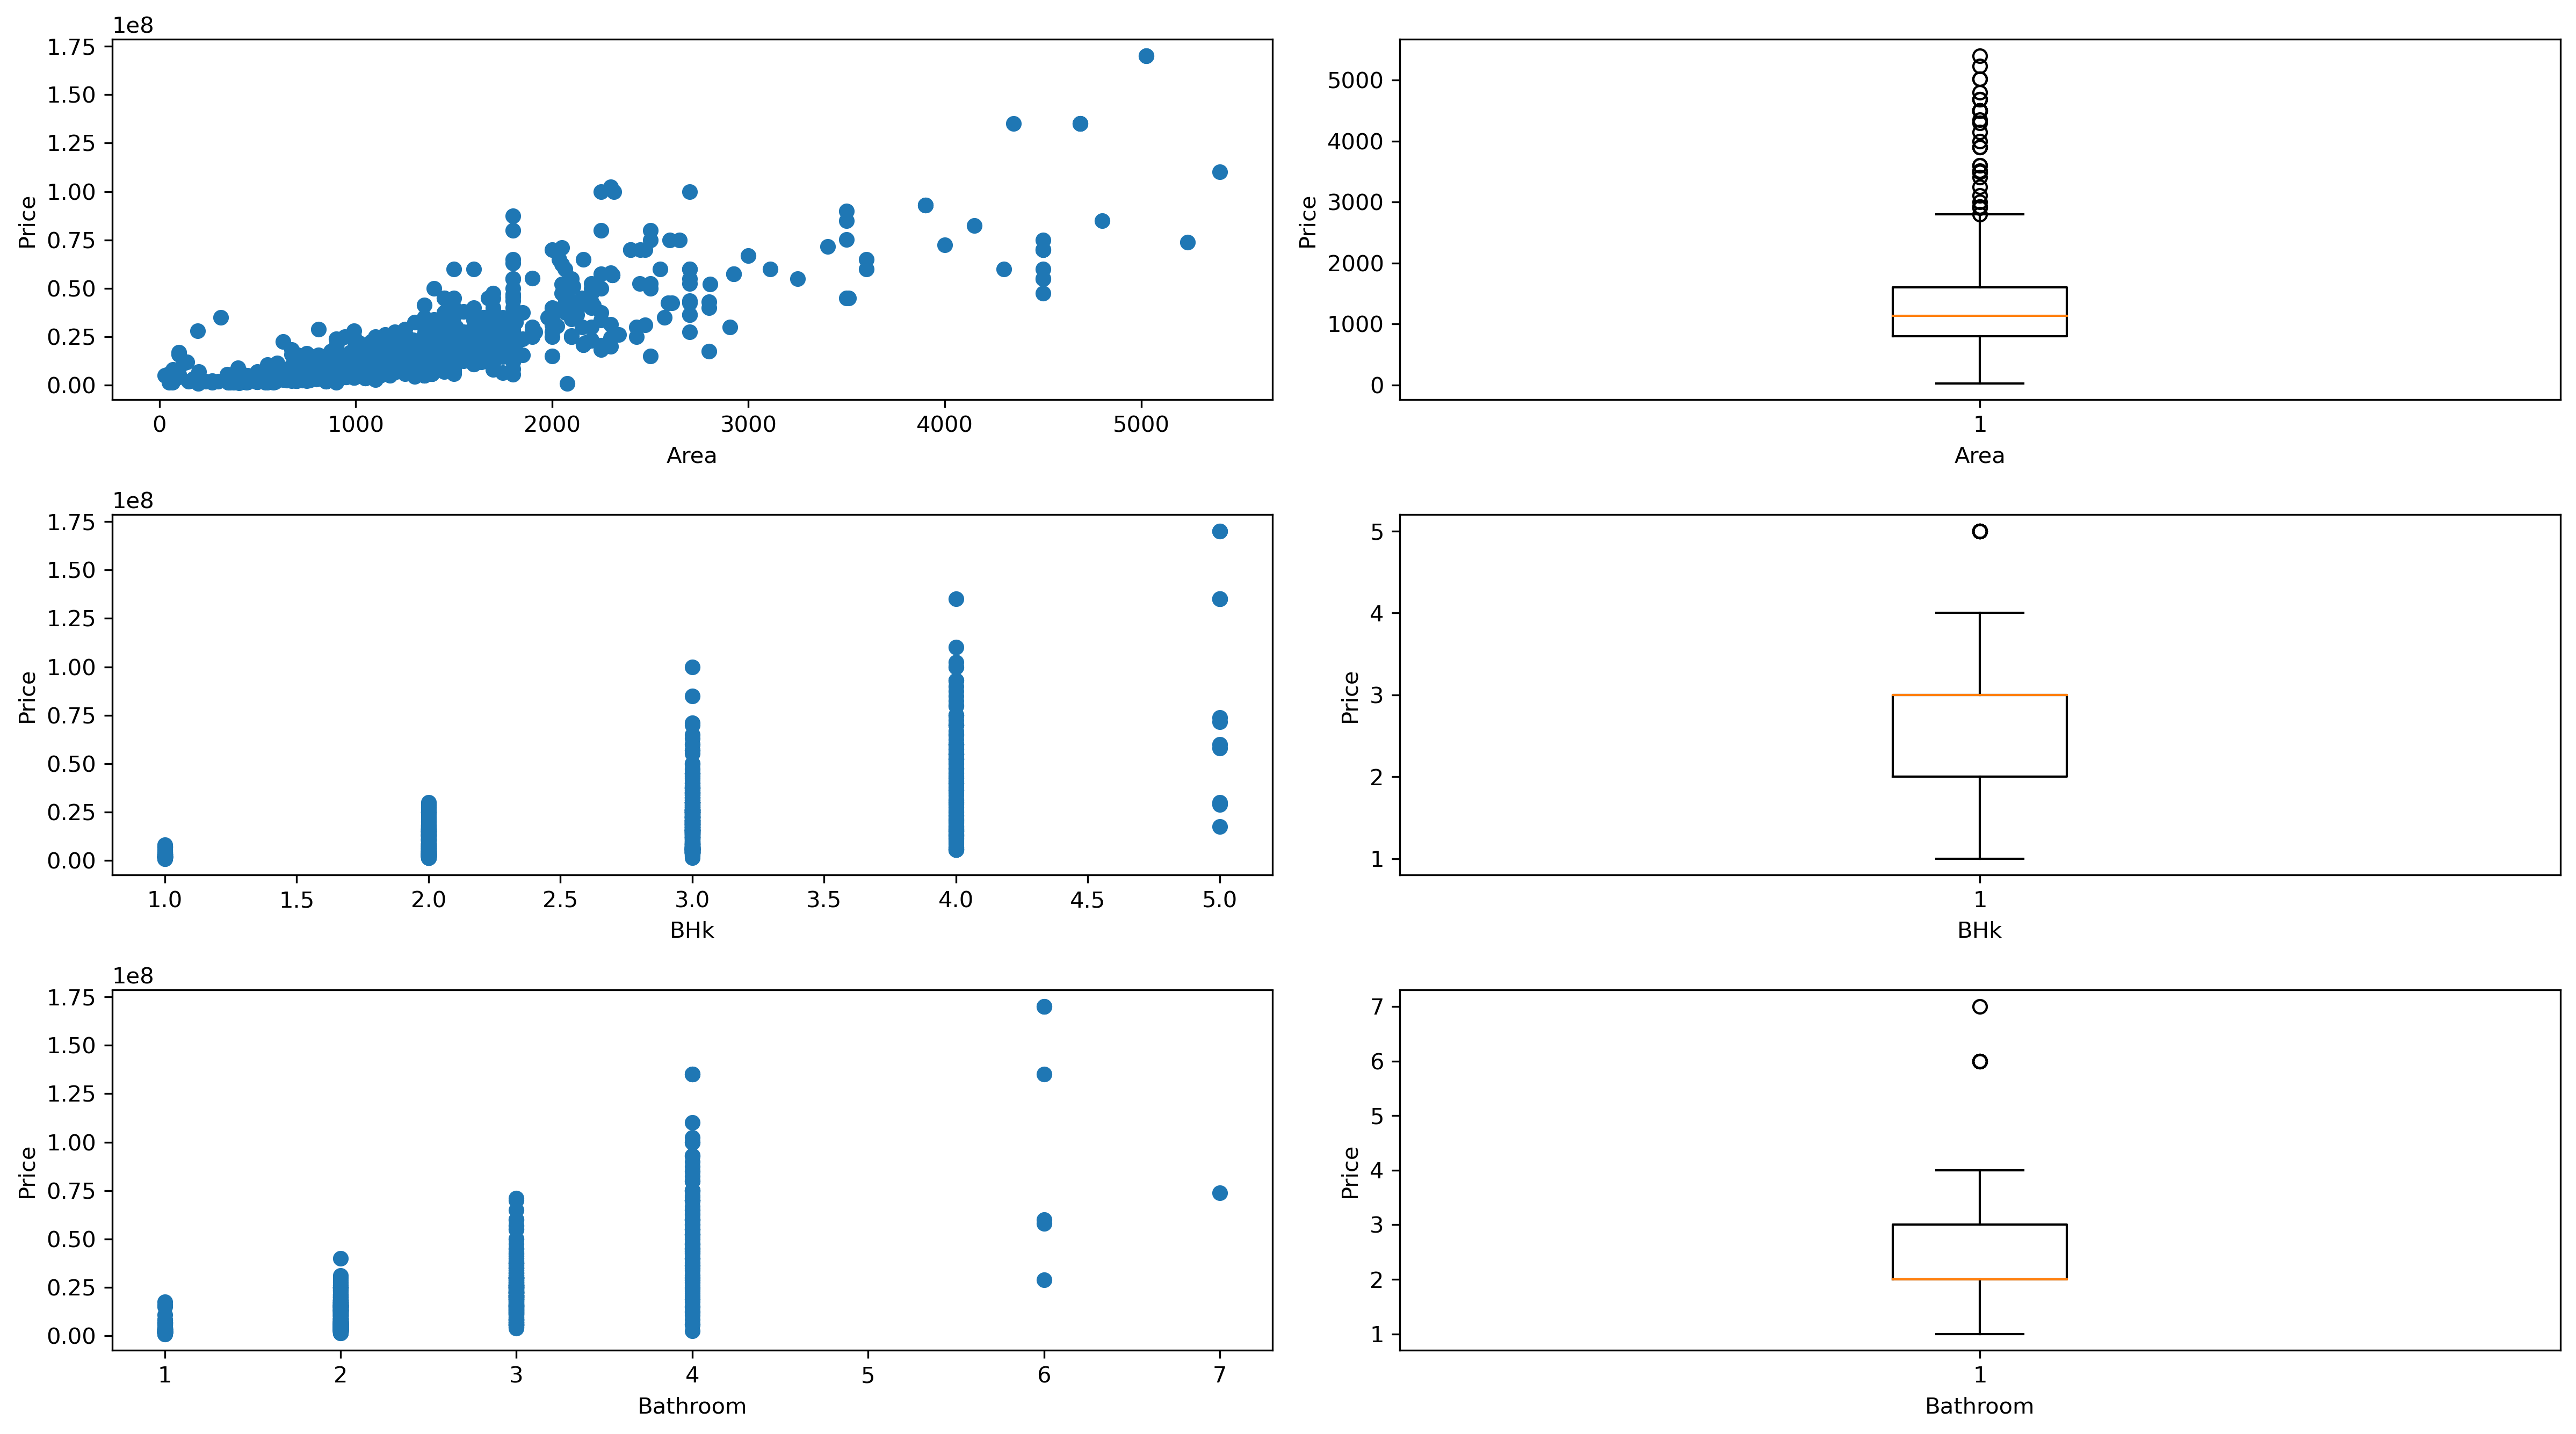

In [185]:
ig , axes = plt.subplots(3,2,figsize=(16,9),dpi=300)


axes[0][0].scatter(dff['Area'],dff['Price'])
axes[0][1].boxplot(dff['Area'])
axes[0][0].set_xlabel('Area')
axes[0][0].set_ylabel('Price')
axes[0][1].set_xlabel('Area')
axes[0][1].set_ylabel('Price')

axes[1][0].scatter(dff['BHK'],dff['Price'])
axes[1][1].boxplot(dff['BHK'])
axes[1][0].set_xlabel('BHk')
axes[1][0].set_ylabel('Price')
axes[1][1].set_xlabel('BHk')
axes[1][1].set_ylabel('Price')


axes[2][0].scatter(dff['Bathroom'],dff['Price'])
axes[2][1].boxplot(dff['Bathroom'])
axes[2][0].set_xlabel('Bathroom')
axes[2][0].set_ylabel('Price')
axes[2][1].set_xlabel('Bathroom')
axes[2][1].set_ylabel('Price')

plt.tight_layout()

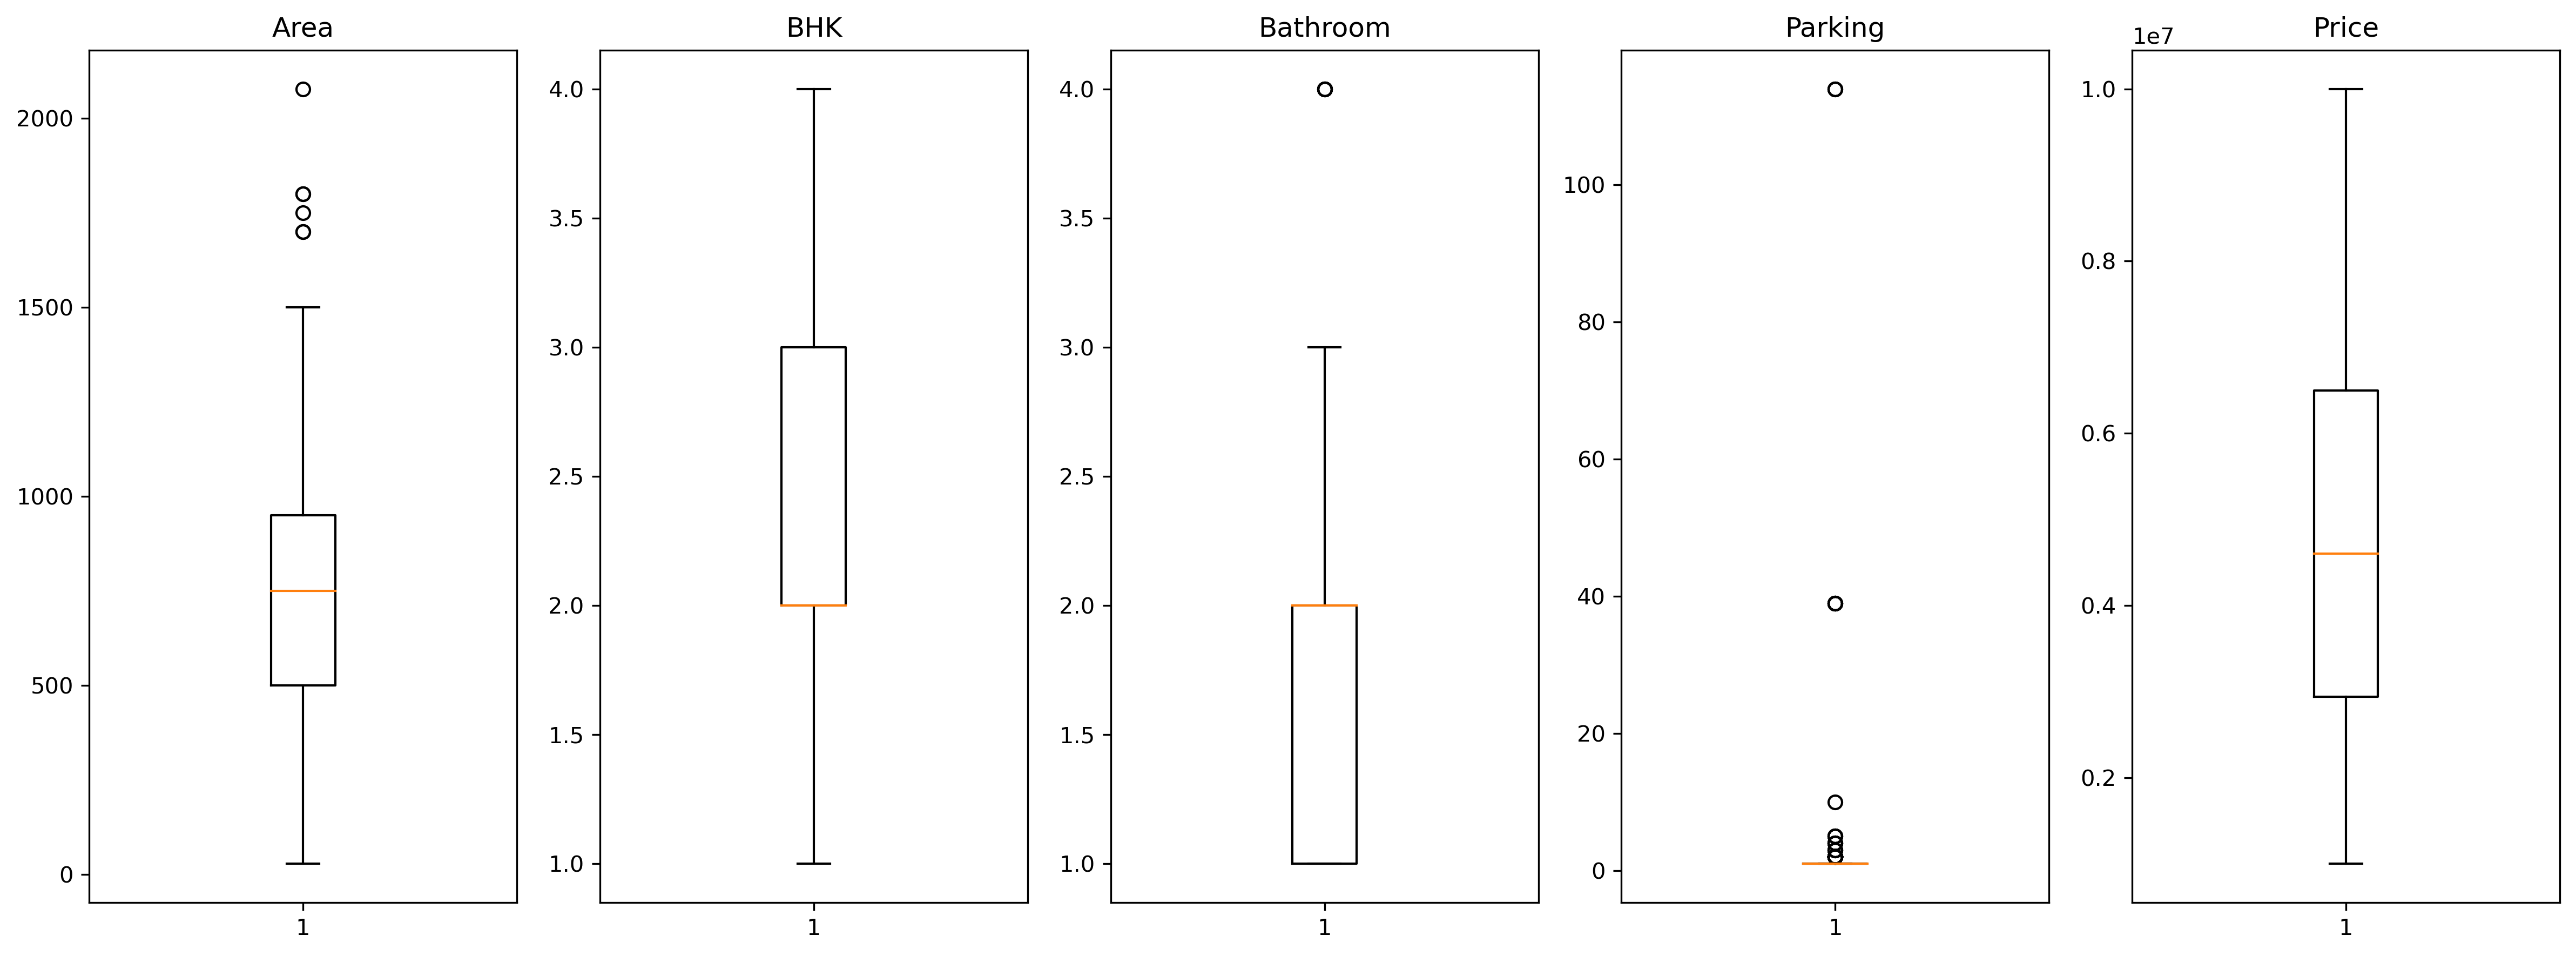

In [28]:
fig , axes = plt.subplots(1,5,figsize=(16,6),dpi=300)
 
axes[0].boxplot(dff['Area'])
axes[0].set_title('Area')
axes[1].boxplot(dff['BHK'])
axes[1].set_title('BHK')
axes[2].boxplot(dff['Bathroom'])
axes[2].set_title('Bathroom')
axes[3].boxplot(dff['Parking'])
axes[3].set_title('Parking')
axes[4].boxplot(dff['Price'])
axes[4].set_title('Price')
 
    
plt.tight_layout()

So the parking feature has less corrlection so that is not going to affect model

# After removing outliers

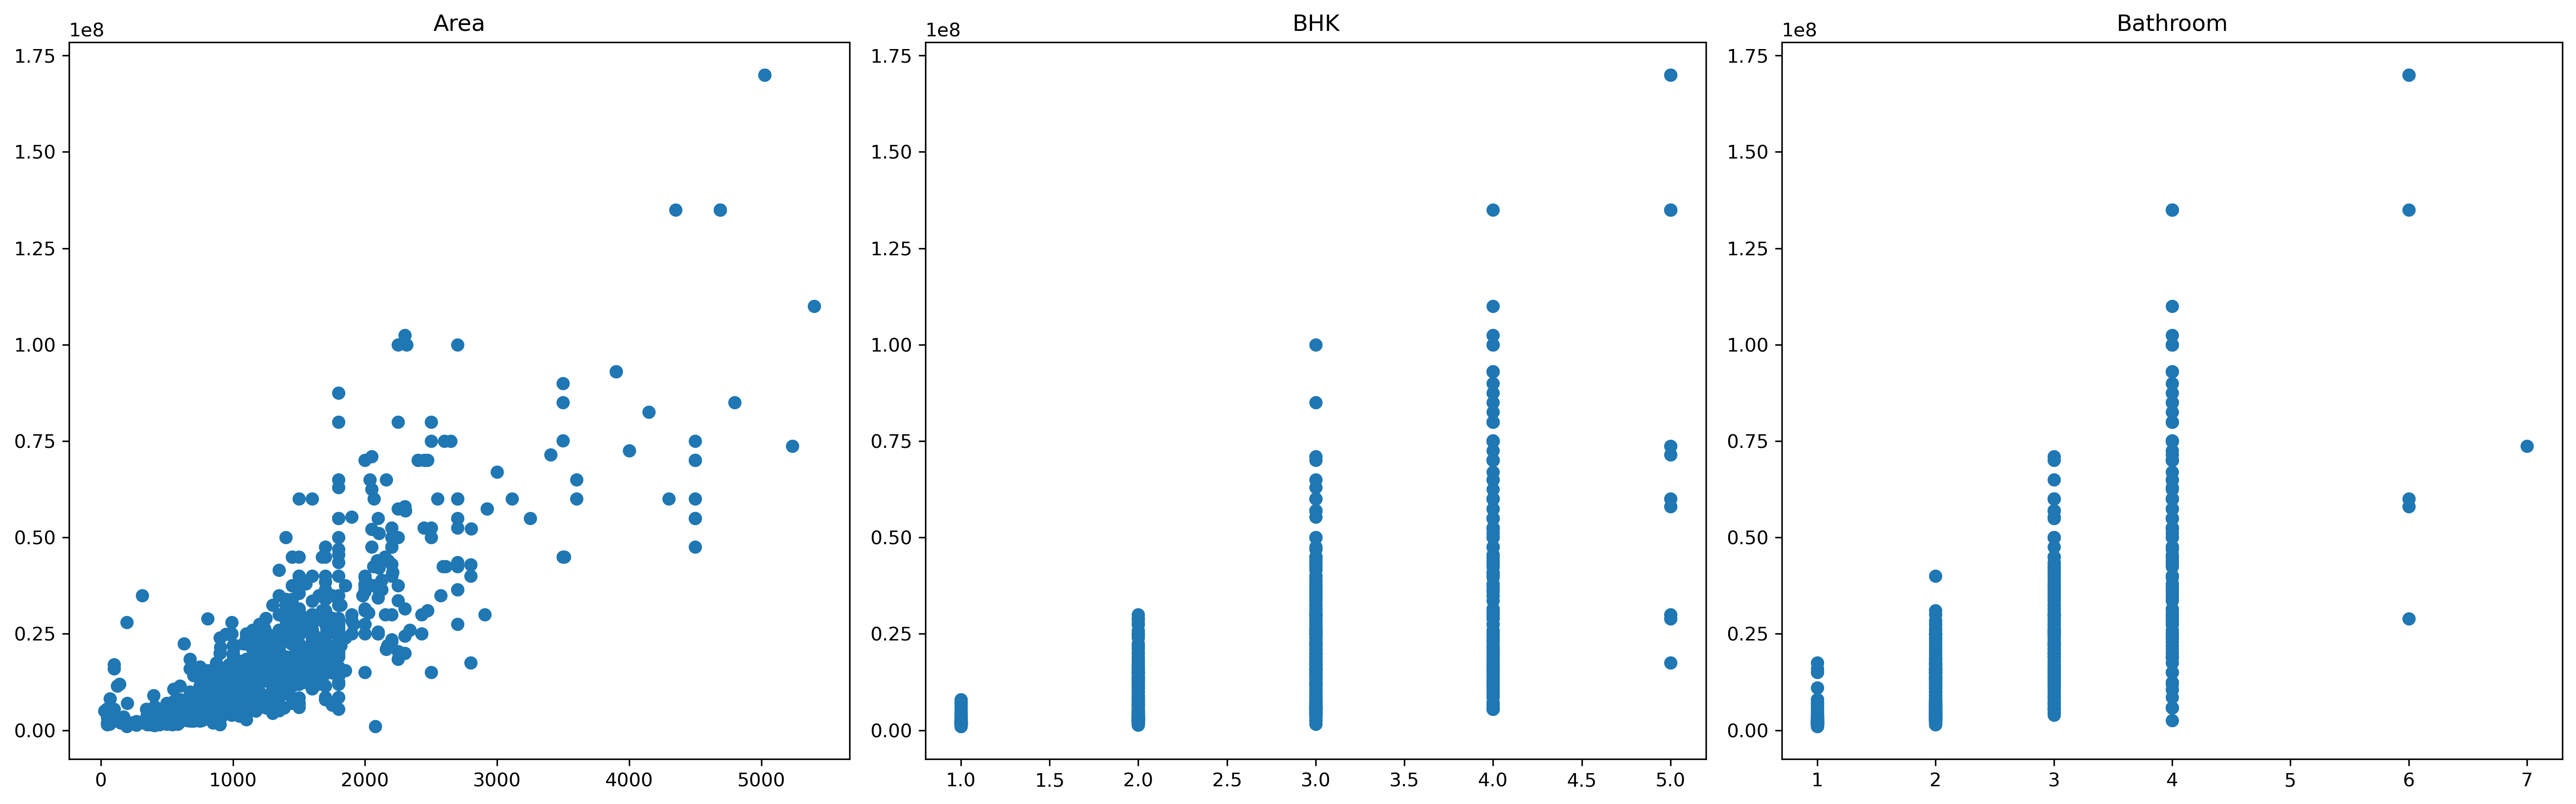

In [186]:
fig , axes = plt.subplots(1,3,figsize=(19,6),dpi=300)
 
axes[0].scatter(dff['Area'],dff['Price'])
axes[0].set_title('Area')

axes[1].scatter(dff['BHK'],dff['Price'])
axes[1].set_title('BHK')

axes[2].scatter(dff['Bathroom'],dff['Price'])
axes[2].set_title('Bathroom')


plt.tight_layout()

In [31]:
dff.corr()['Price'].sort_values()

Furnishing_Unfurnished      -0.096301
Status_Ready_to_move        -0.058996
Type_Builder_Floor           0.013776
Transaction_Resale           0.071930
Parking                      0.075160
Furnishing_Semi-Furnished    0.084193
Bathroom                     0.513145
BHK                          0.522453
Area                         0.597695
Price                        1.000000
Name: Price, dtype: float64

<AxesSubplot:>

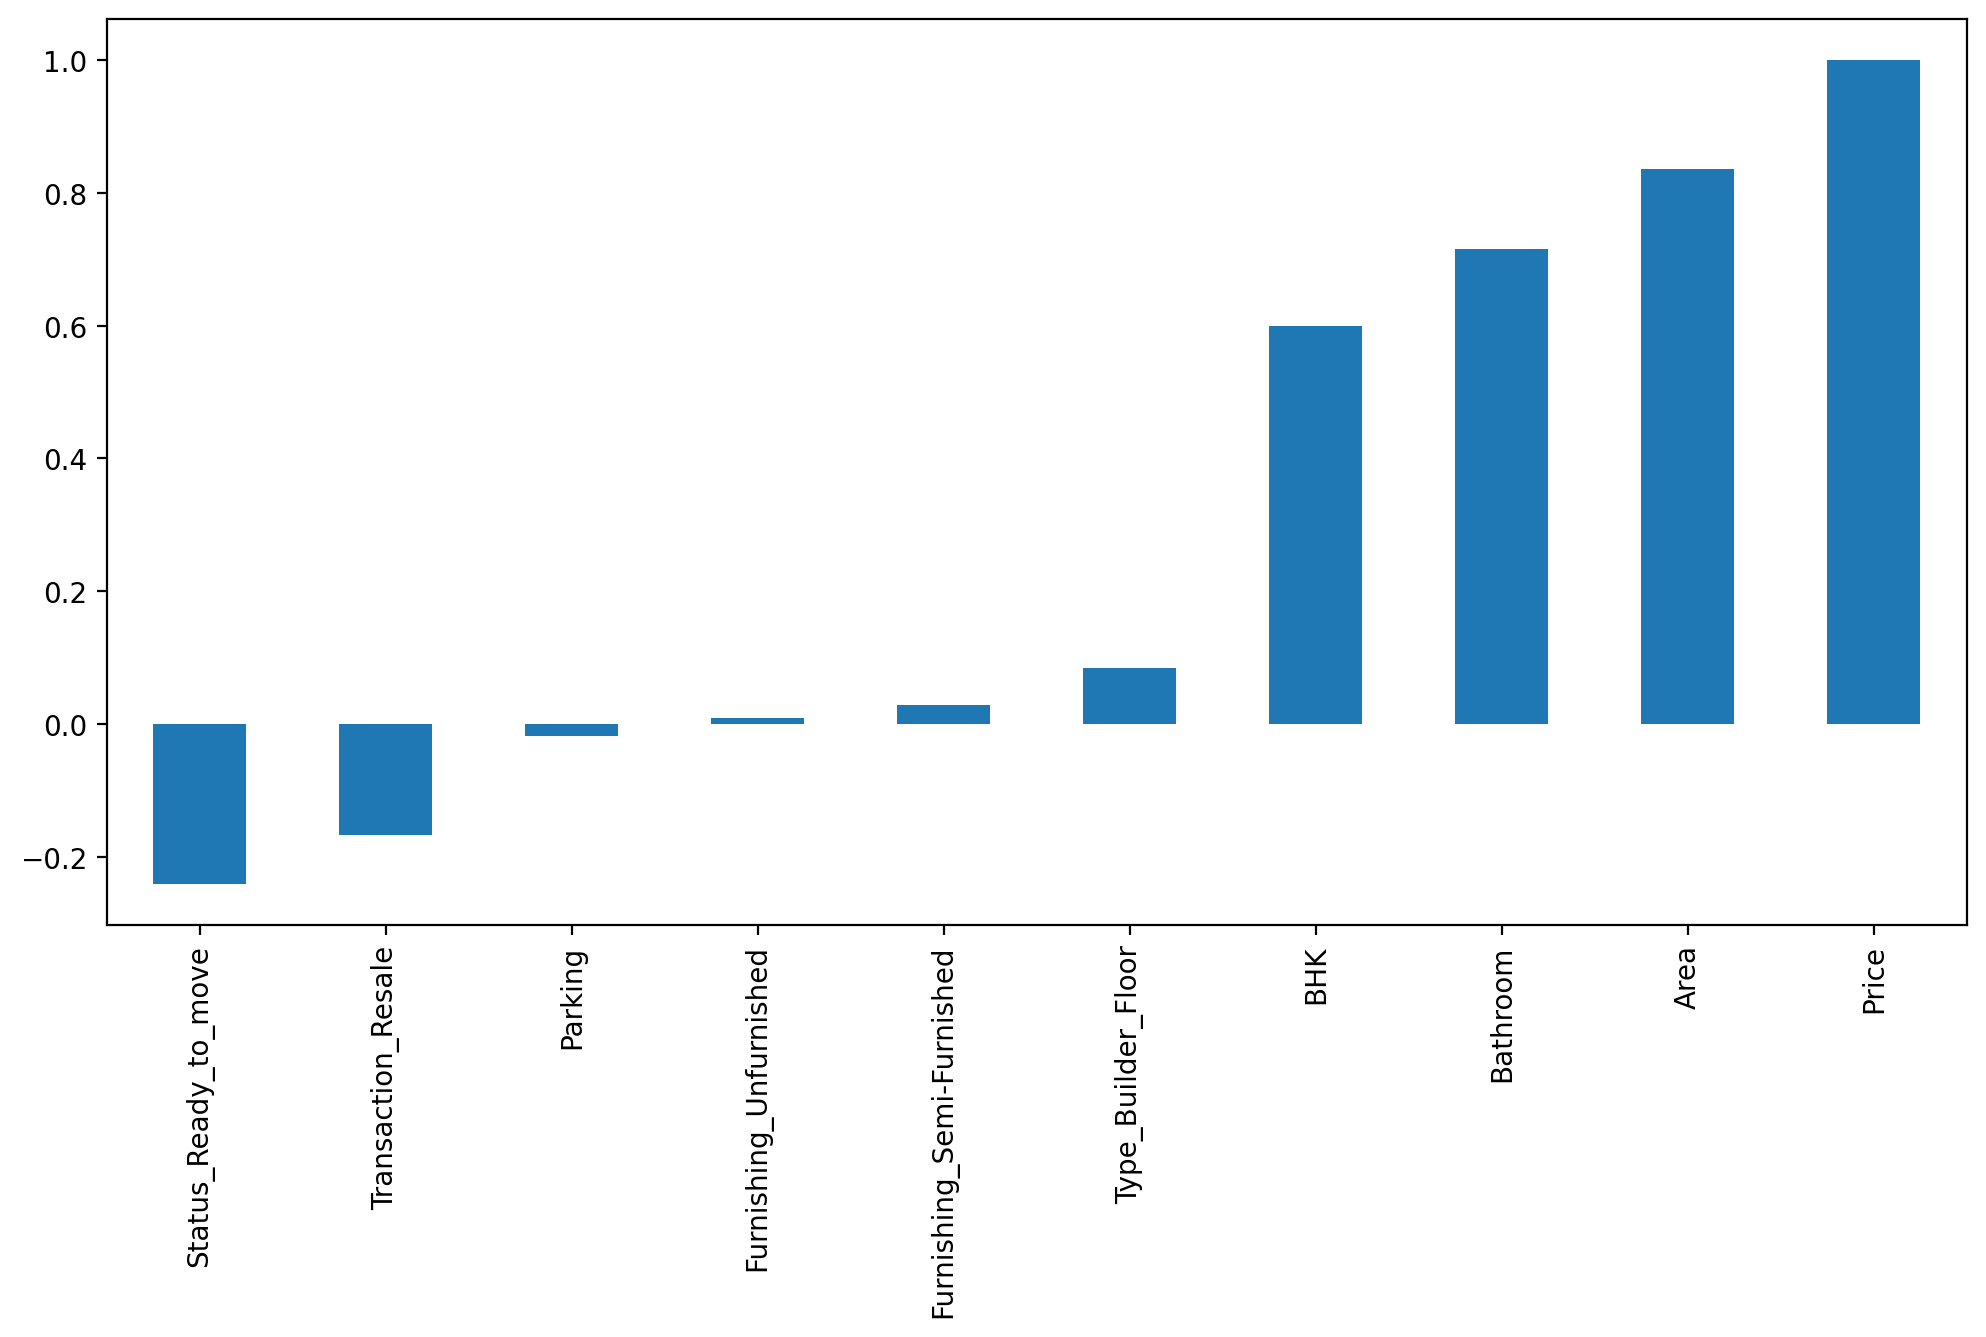

In [187]:
plt.figure(figsize=(12,6),dpi=200)
dff.corr()['Price'].sort_values().plot(kind='bar')

# Now lets do the Regression on that Data

# Data Preparation

In [188]:
X = dff.drop('Price',axis=1)
y = dff['Price']

# Train test split

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [191]:
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler,StandardScaler

# Scaling

In [192]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [193]:
from sklearn.linear_model import LinearRegression

In [194]:
model = LinearRegression()
model.fit(X_train,y_train)
Linear_pred = model.predict(X_test)

# Evaluating

In [195]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [196]:
np.sqrt(mean_squared_error(y_test,Linear_pred))

10433519.53888629

In [197]:
np.sqrt(mean_squared_error(y_test,Linear_pred))

10433519.53888629

In [198]:
r2_score(y_test,Linear_pred)*100

71.520915986418

#### Checking how far we are from actual data points

In [199]:
Linear_Residules = y_test - Linear_pred

In [200]:
Linear_Residules

182    -3.738097e+06
825    -1.700846e+07
501    -3.905391e+06
254     3.334123e+07
735     3.864672e+06
            ...     
143     1.182404e+06
1016    7.287291e+06
1151   -3.136197e+06
1047    4.073682e+05
679     1.363661e+07
Name: Price, Length: 345, dtype: float64

C:\Users\Siddharth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


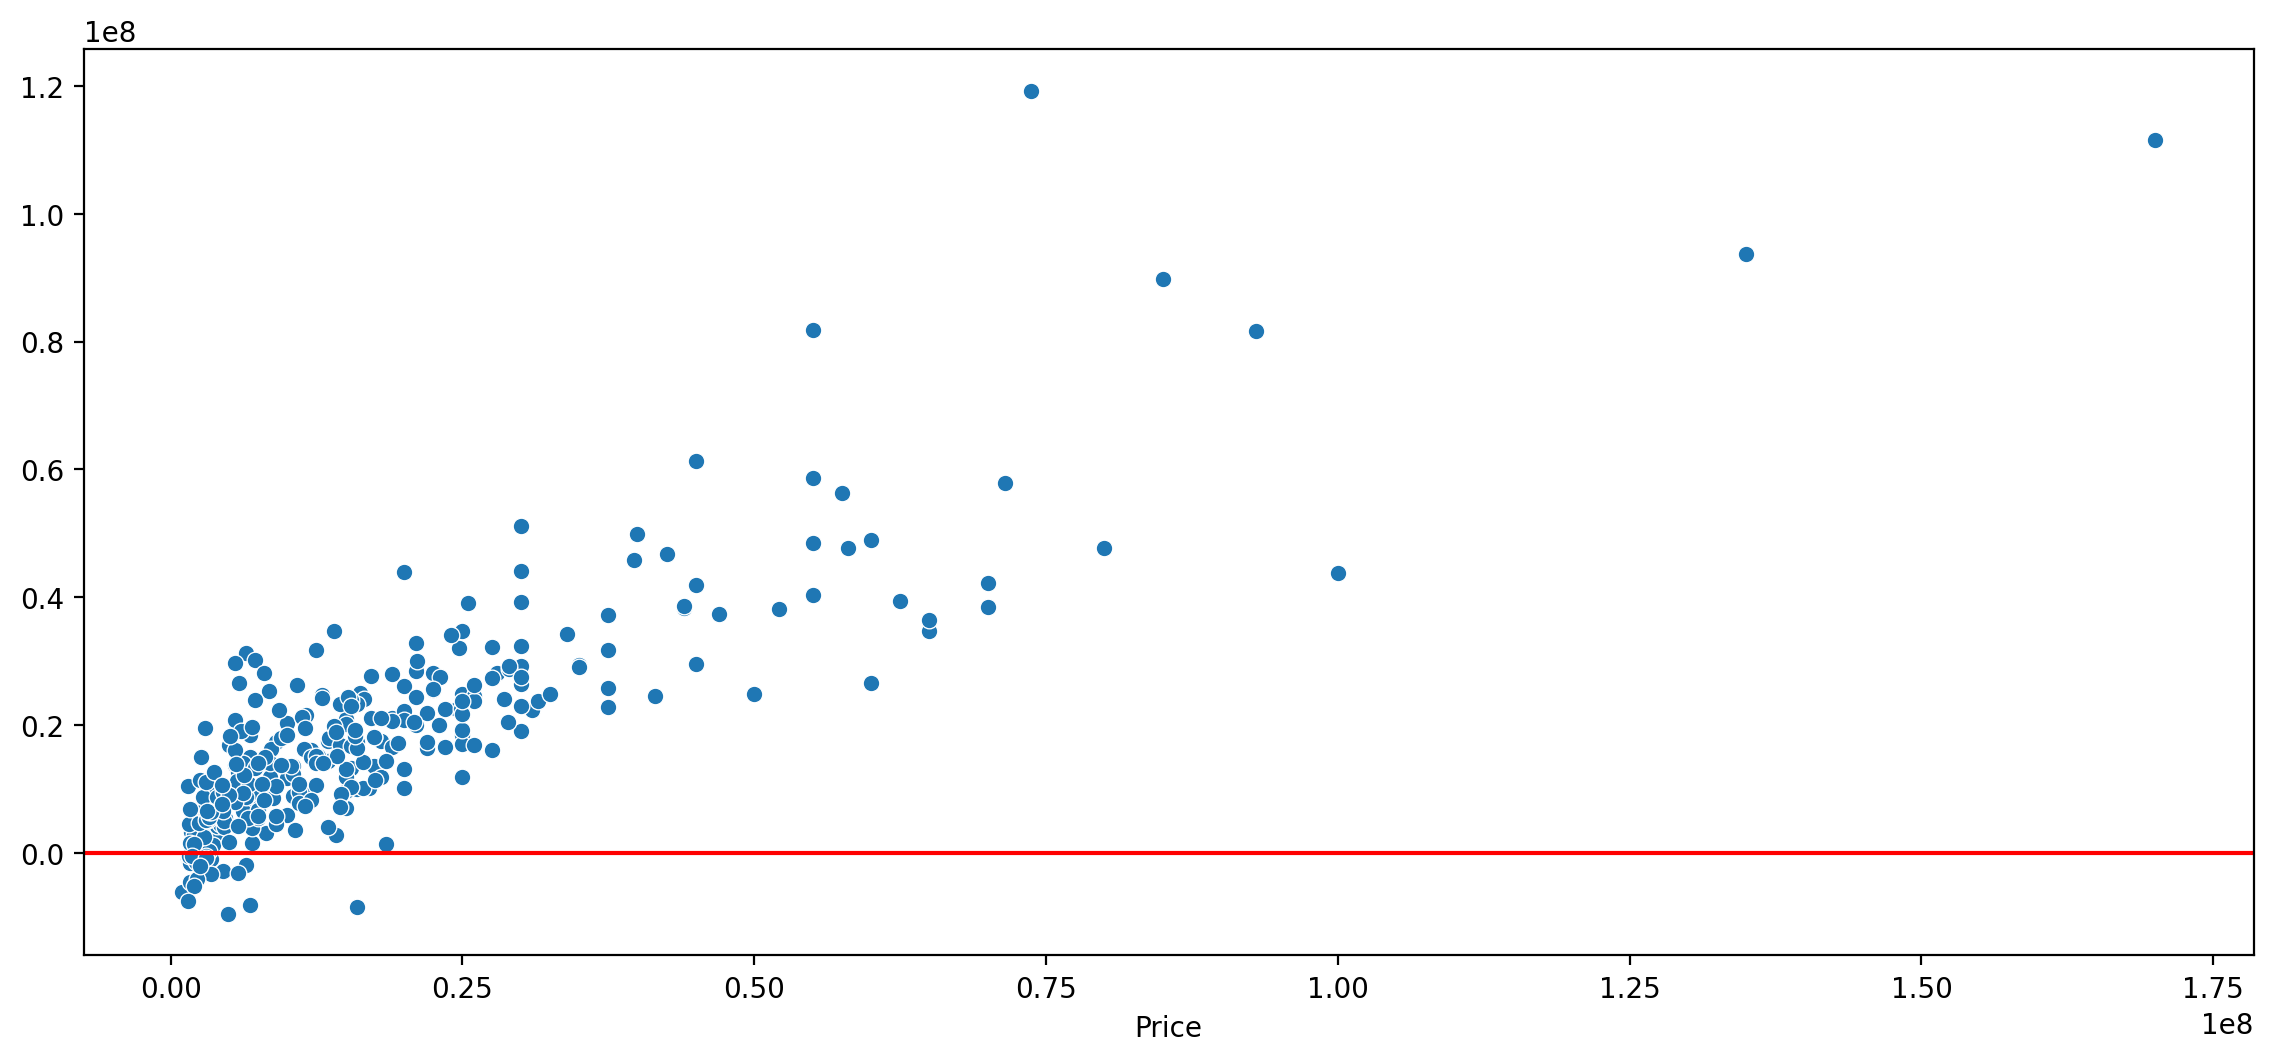

In [201]:
plt.figure(figsize=(14,6),dpi=200)
sns.scatterplot(y_test,Linear_pred)
plt.axhline(y=0,color='r')

Above plot is demonstrating that the different between true value and predicted values is not close to zero means we have lot of difference in actual and predicted values.

it is first indication is that we do not use Model is not Good.


## Impliment polynomal

In [202]:
from sklearn.preprocessing import PolynomialFeatures

In [203]:
poly = PolynomialFeatures(2,include_bias=False)
poly_fetures = poly.fit_transform(dff.drop('Price',axis=1))
X_train, X_test, y_train, y_test = train_test_split(poly_fetures, y, test_size=0.33, random_state=42)

# polynomial model with degree 2
poly_model = LinearRegression()
poly_model.fit(X_train,y_train)
poly_prediction = poly_model.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_test,poly_prediction))
MAE = mean_absolute_error(y_test,poly_prediction)

print('Mean Absolute Error',MAE)
print('RMSE',RMSE)

Mean Absolute Error 6397111.944384362
RMSE 11400370.560134584


### Ploting Residule Error

In [205]:
poly_residuals_2 = y_test - poly_prediction

C:\Users\Siddharth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'polynomial degree 2')

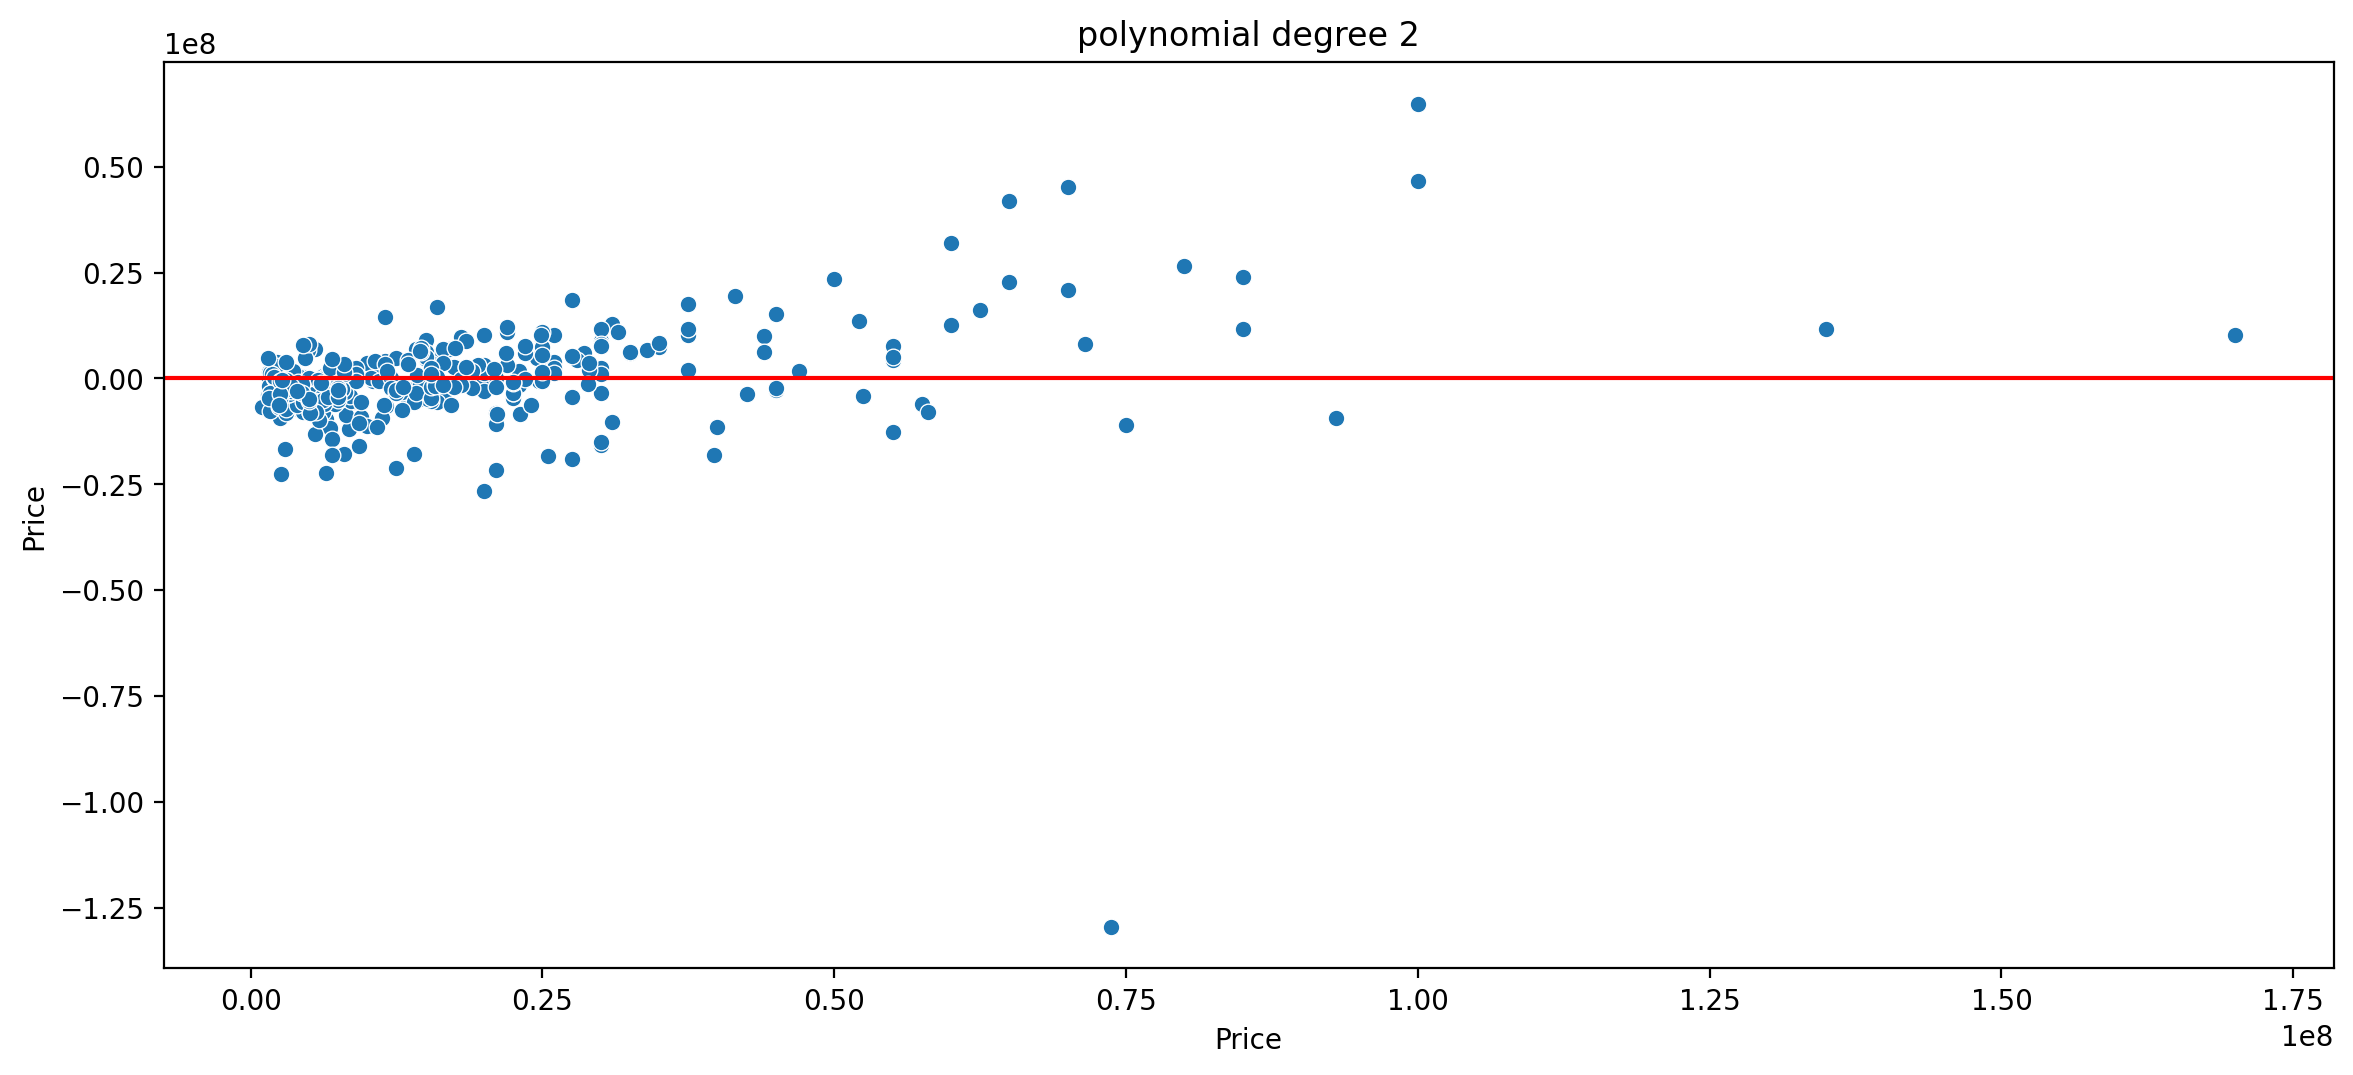

In [206]:
plt.figure(figsize=(14,6),dpi=200)
sns.scatterplot(y_test,poly_residuals_2)
plt.axhline(y=0,color='r')
plt.title('polynomial degree 2')

well we have achived to pull thoes points zlose to zero. however a we can go further in order to make it more close to zero with higher degree of polynomial

MSE 153860834.86951542
Percentage 836.747871834555


C:\Users\Siddharth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, "('Degree', 3)")

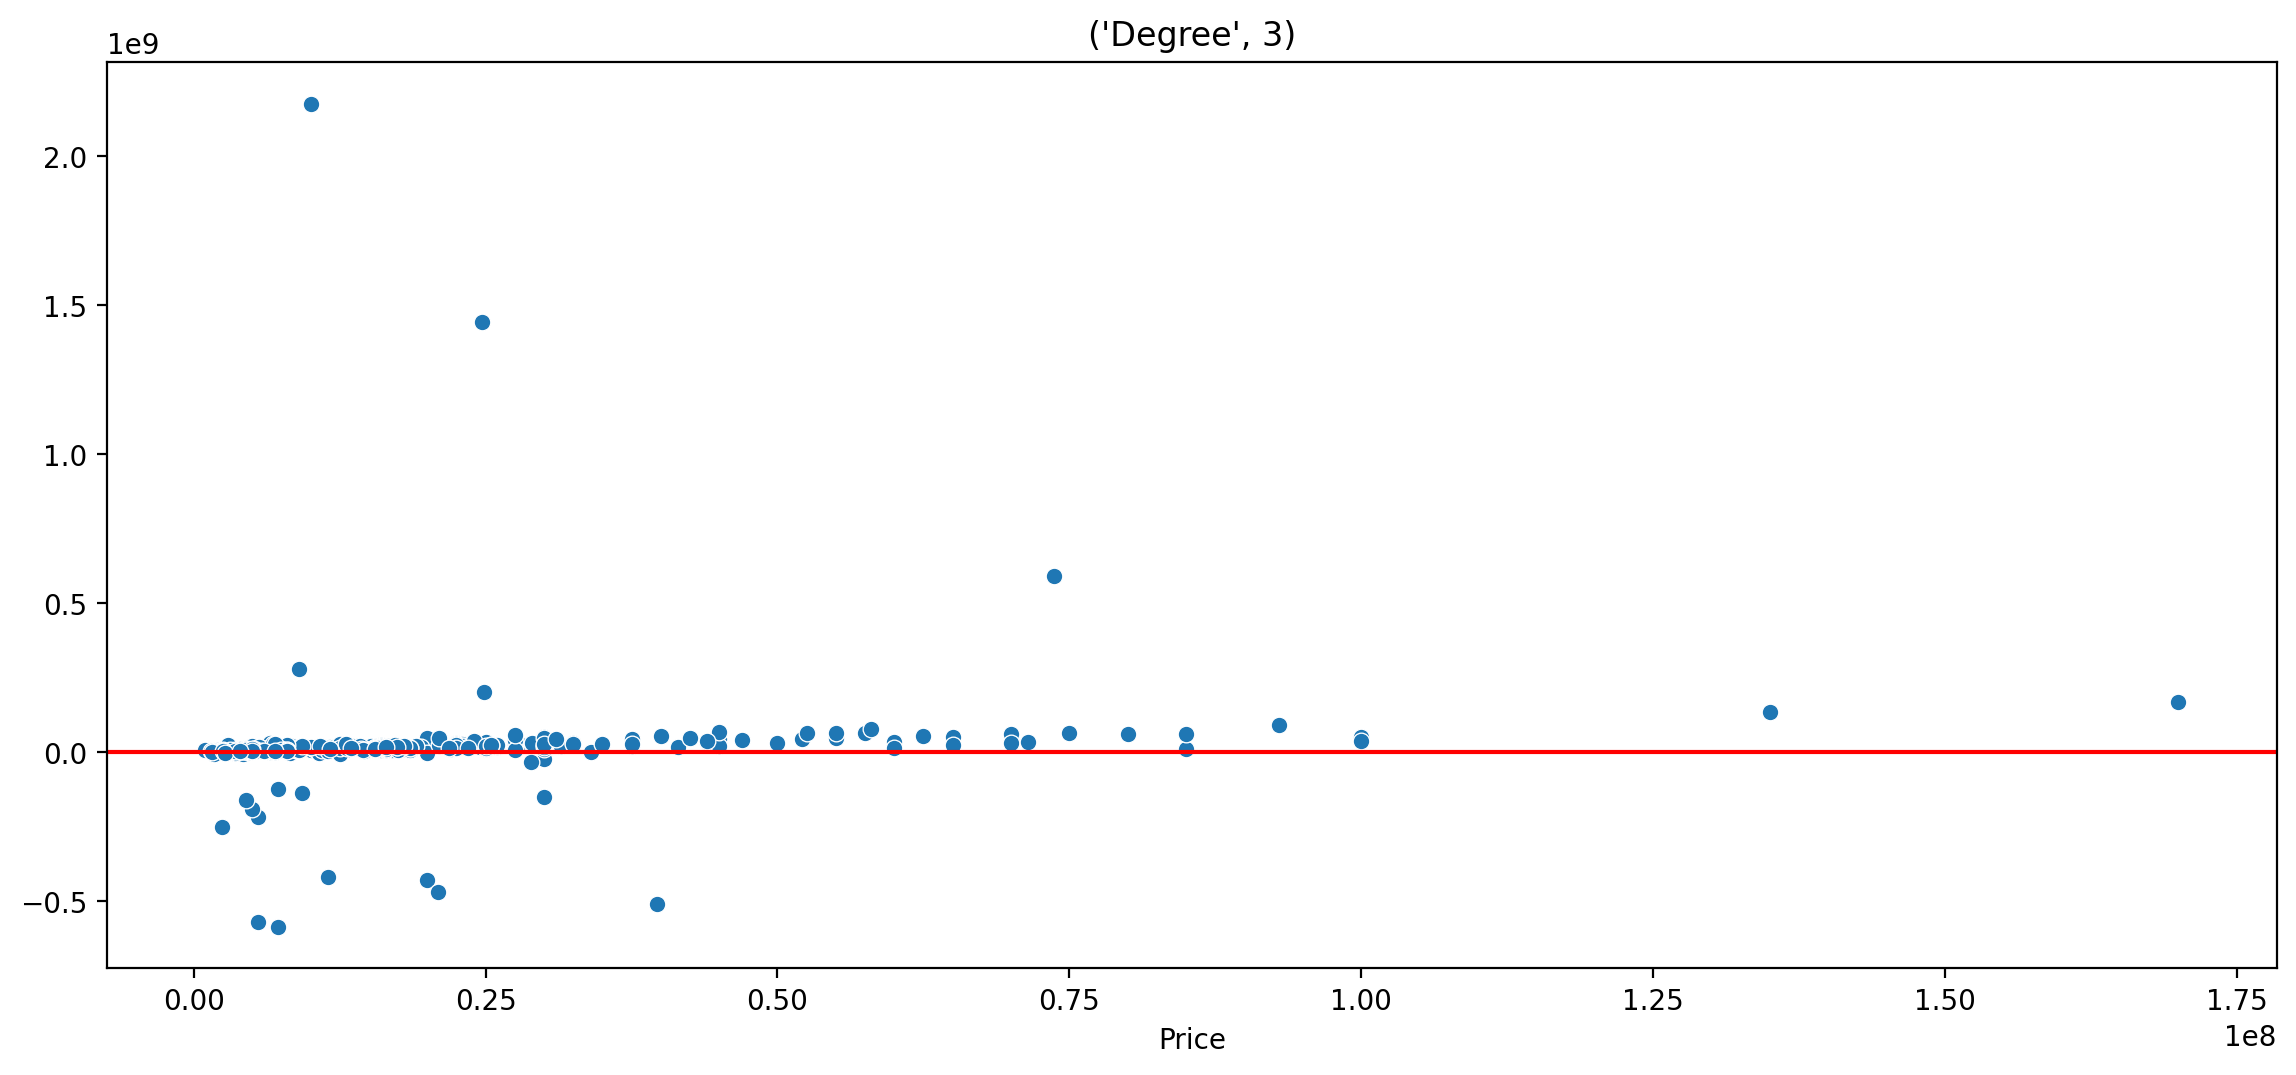

In [207]:
degree = 3


poly = PolynomialFeatures(degree,include_bias=False)
poly_fetures = poly.fit_transform(dff.drop('Price',axis=1))
X_train, X_test, y_train, y_test = train_test_split(poly_fetures, y, test_size=0.33, random_state=42)
poly_model = LinearRegression()
poly_model.fit(X_train,y_train)
poly_prediction = poly_model.predict(X_test)
print('MSE',np.sqrt(mean_squared_error(y_test,poly_prediction)))
print('Percentage',100 * np.sqrt(mean_squared_error(y_test,poly_prediction)) / dff['Price'].mean())

poly_residule_3 = y_test - poly_prediction
plt.figure(figsize=(14,6),dpi=200)
sns.scatterplot(y_test,poly_prediction)
plt.axhline(y=0,color='r')

title = 'Degree',degree
plt.title(title)

MSE 29140569600.95314
Percentage 158476.38951343915


C:\Users\Siddharth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'y')

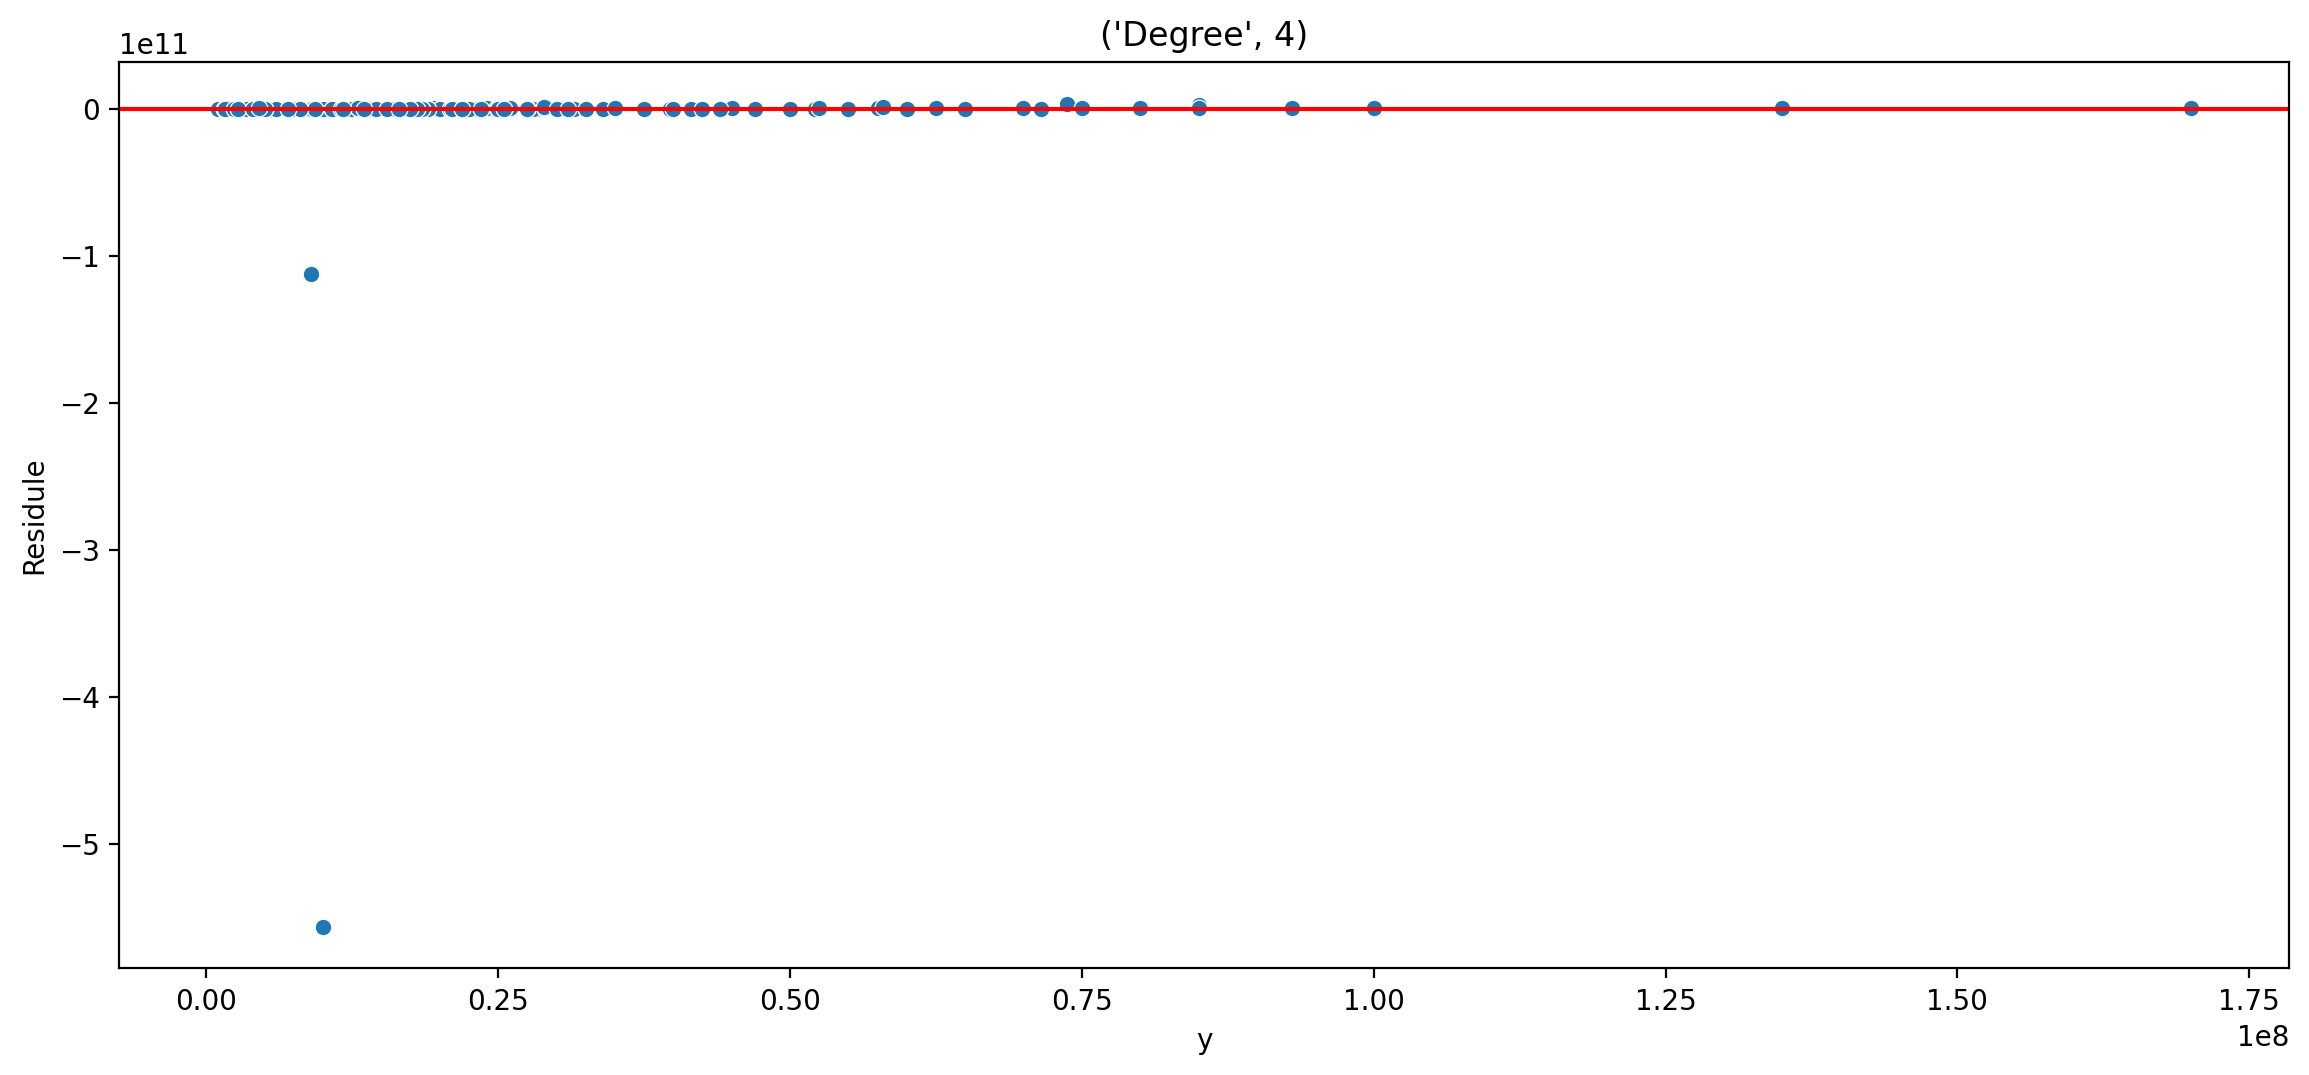

In [208]:
degree = 4


poly = PolynomialFeatures(degree,include_bias=False)
poly_fetures = poly.fit_transform(dff.drop('Price',axis=1))
X_train, X_test, y_train, y_test = train_test_split(poly_fetures, y, test_size=0.33, random_state=42)
poly_model = LinearRegression()
poly_model.fit(X_train,y_train)
poly_prediction = poly_model.predict(X_test)
print('MSE',np.sqrt(mean_squared_error(y_test,poly_prediction)))
print('Percentage',100 * np.sqrt(mean_squared_error(y_test,poly_prediction)) / dff['Price'].mean())

poly_residule_4 = y_test - poly_prediction
plt.figure(figsize=(14,6),dpi=200)
sns.scatterplot(y_test,poly_prediction)
plt.axhline(y=0,color='r')

title = 'Degree',degree
plt.title(title)
plt.ylabel('Residule')
plt.xlabel('y')

# The Question arries here ?

how many polynomial degree we suppose to choose !

Residual = actual y value − predicted y value , r i = y i − y i ^ . Having a negative residual means that the predicted value is too high, similarly if you have a positive residual it means that the predicted value was too low. The aim of a regression line is to minimise the sum of residuals.

# Residual Error plot on each polynomial order

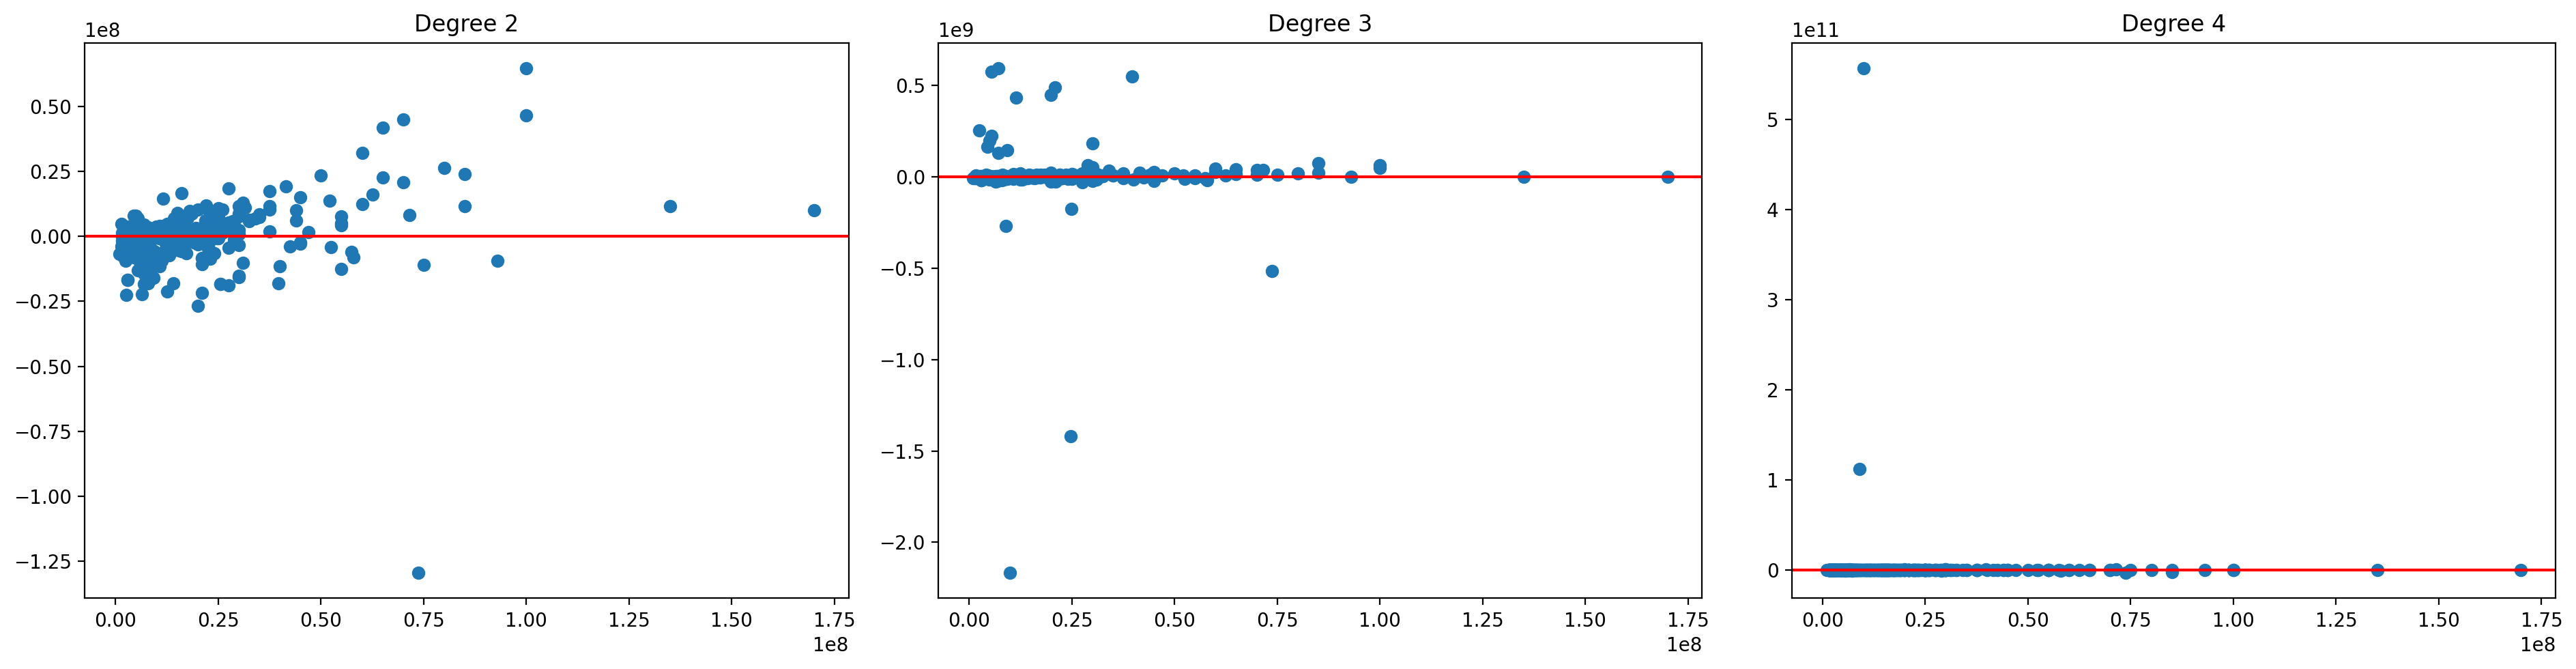

In [210]:
fig , axes = plt.subplots(1,3,figsize=(19,5),dpi=200)

axes[0].scatter(x=y_test,y=poly_residuals_2)
axes[0].set_title('Degree 2')
axes[0].axhline(y=0,color='r')


axes[1].scatter(x=y_test,y=poly_residule_3)
axes[1].set_title('Degree 3')
axes[1].axhline(y=0,color='r')

axes[2].scatter(x=y_test,y=poly_residule_4)
axes[2].set_title('Degree 4')
axes[2].axhline(y=0,color='r')
 


plt.tight_layout()

Here the degree can not determined by interpreting Residule becuase higher degree hit the every single point so the higher degree you go the lower residual you are going to get which is Overfitting.

because when you train that overfitted (Every point hit poliynomal model) you are going to get high bias(Error) on testing/validation Data sets

#### Now we have to check which degree is diminishing training as well as testing error

# Chossing right polynomial degree BY considering RMSE

In [211]:
X = dff.drop('Price',axis=1)
y = dff['Price']

In [212]:
training_Error = []
testing_Error = []
for i in range(1,10):
    
    poly_converter = PolynomialFeatures(degree=i,include_bias=False)
    poly_fetures = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_fetures, y, test_size=0.33, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    training_pred = model.predict(X_train)
    testing_pred = model.predict(X_test)
    
    training_RMSE = np.sqrt(mean_squared_error(y_train,training_pred))
    testing_RMSE = np.sqrt(mean_squared_error(y_test,testing_pred))
    
    training_Error.append(training_RMSE)
    testing_Error.append(testing_RMSE)


In [213]:
training_Error

[9939607.885364177,
 8507000.267909268,
 7053458.416444884,
 17929674.54126214,
 6564011.404394755,
 7407381.888233186,
 6945856.499073394,
 7443194.178372,
 6763693.39463358]

In [214]:
testing_Error

[10760756.557632817,
 11400370.560134584,
 153860834.86951542,
 29140569600.95314,
 101720214700.91975,
 93149829132.77002,
 18642324487.853706,
 19940486953.125095,
 38740805436.82995]

Text(0, 0.5, 'RMSE')

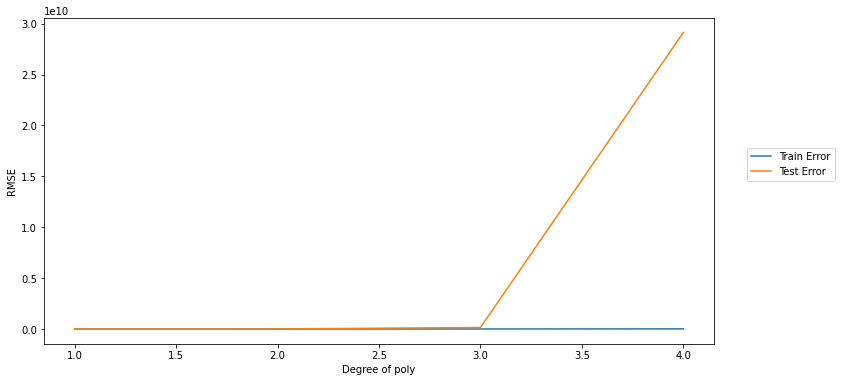

In [215]:
plt.figure(figsize=(12,6))
plt.plot(range(1,5),training_Error[:4],label='Train Error')
plt.plot(range(1,5),testing_Error[:4],label='Test Error')
plt.legend(loc=(1.05,0.5))
plt.xlabel('Degree of poly')
plt.ylabel('RMSE')
 

well here we can see the RMSE is exploded after 3 degree of polyniomial so i goining to choose 2 degree because it has risk to use 3 polynomial

#### In this situation Degree 2 would be the best choise

# Final Model

### Plotting actual points and predicted points on one of the features

In [216]:
poly_full_data = PolynomialFeatures(degree=2)
X = poly_full_data.fit_transform(dff.drop('Price',axis=1))
final = LinearRegression()
final.fit(X,y)
final_predictions = final.predict(X)

In [217]:
residule = y - final_predictions

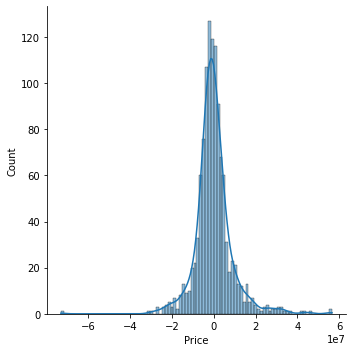

In [241]:
sns.displot(residule,kde=True)

# A Normal Distribution 

##### which indicates most of the values are close to zero

C:\Users\Siddharth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'y')

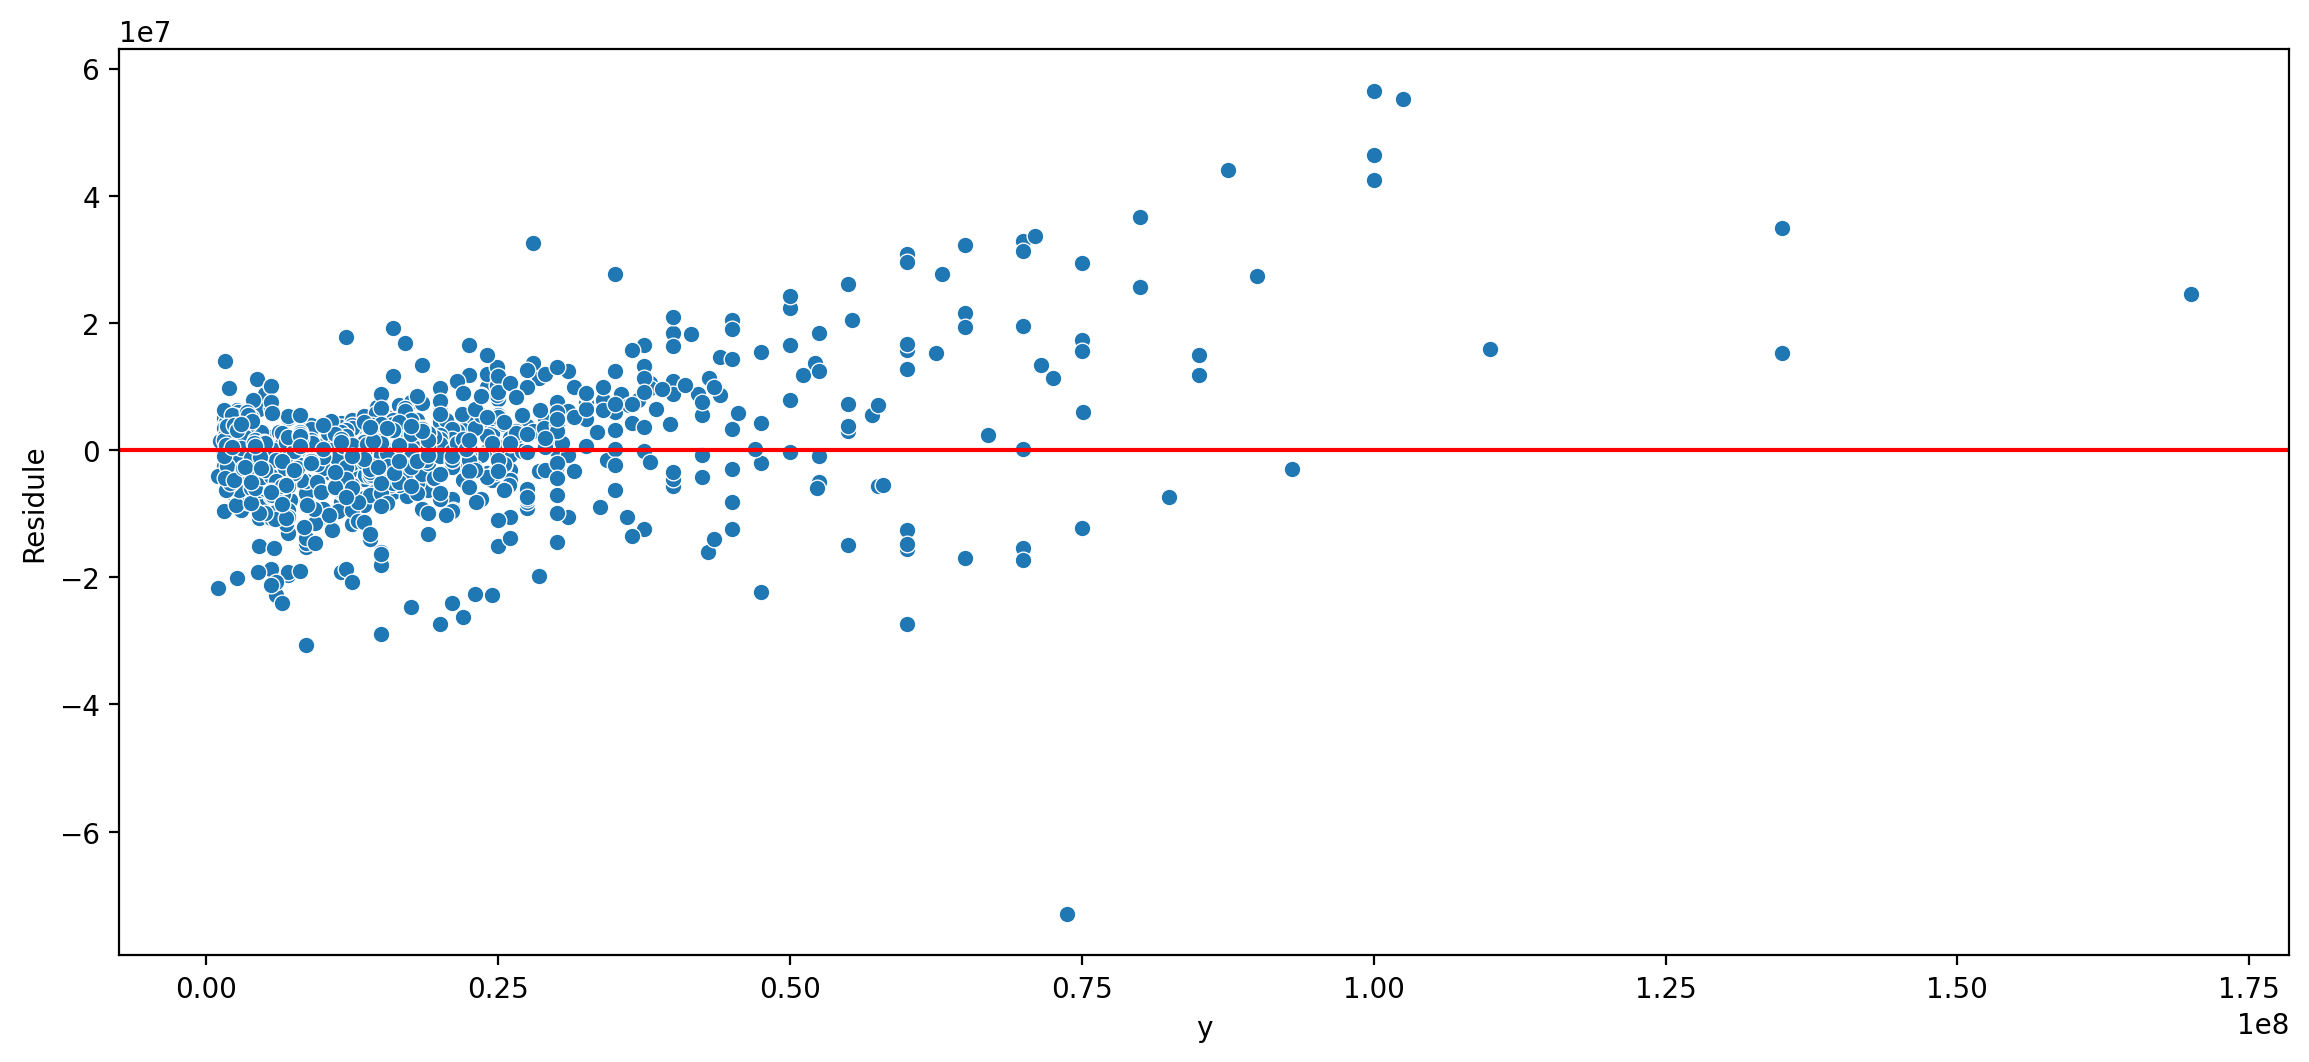

In [219]:
plt.figure(figsize=(14,6),dpi=200)
sns.scatterplot(y,residule)
plt.axhline(y=0,color='r')
plt.ylabel('Residule')
plt.xlabel('y')

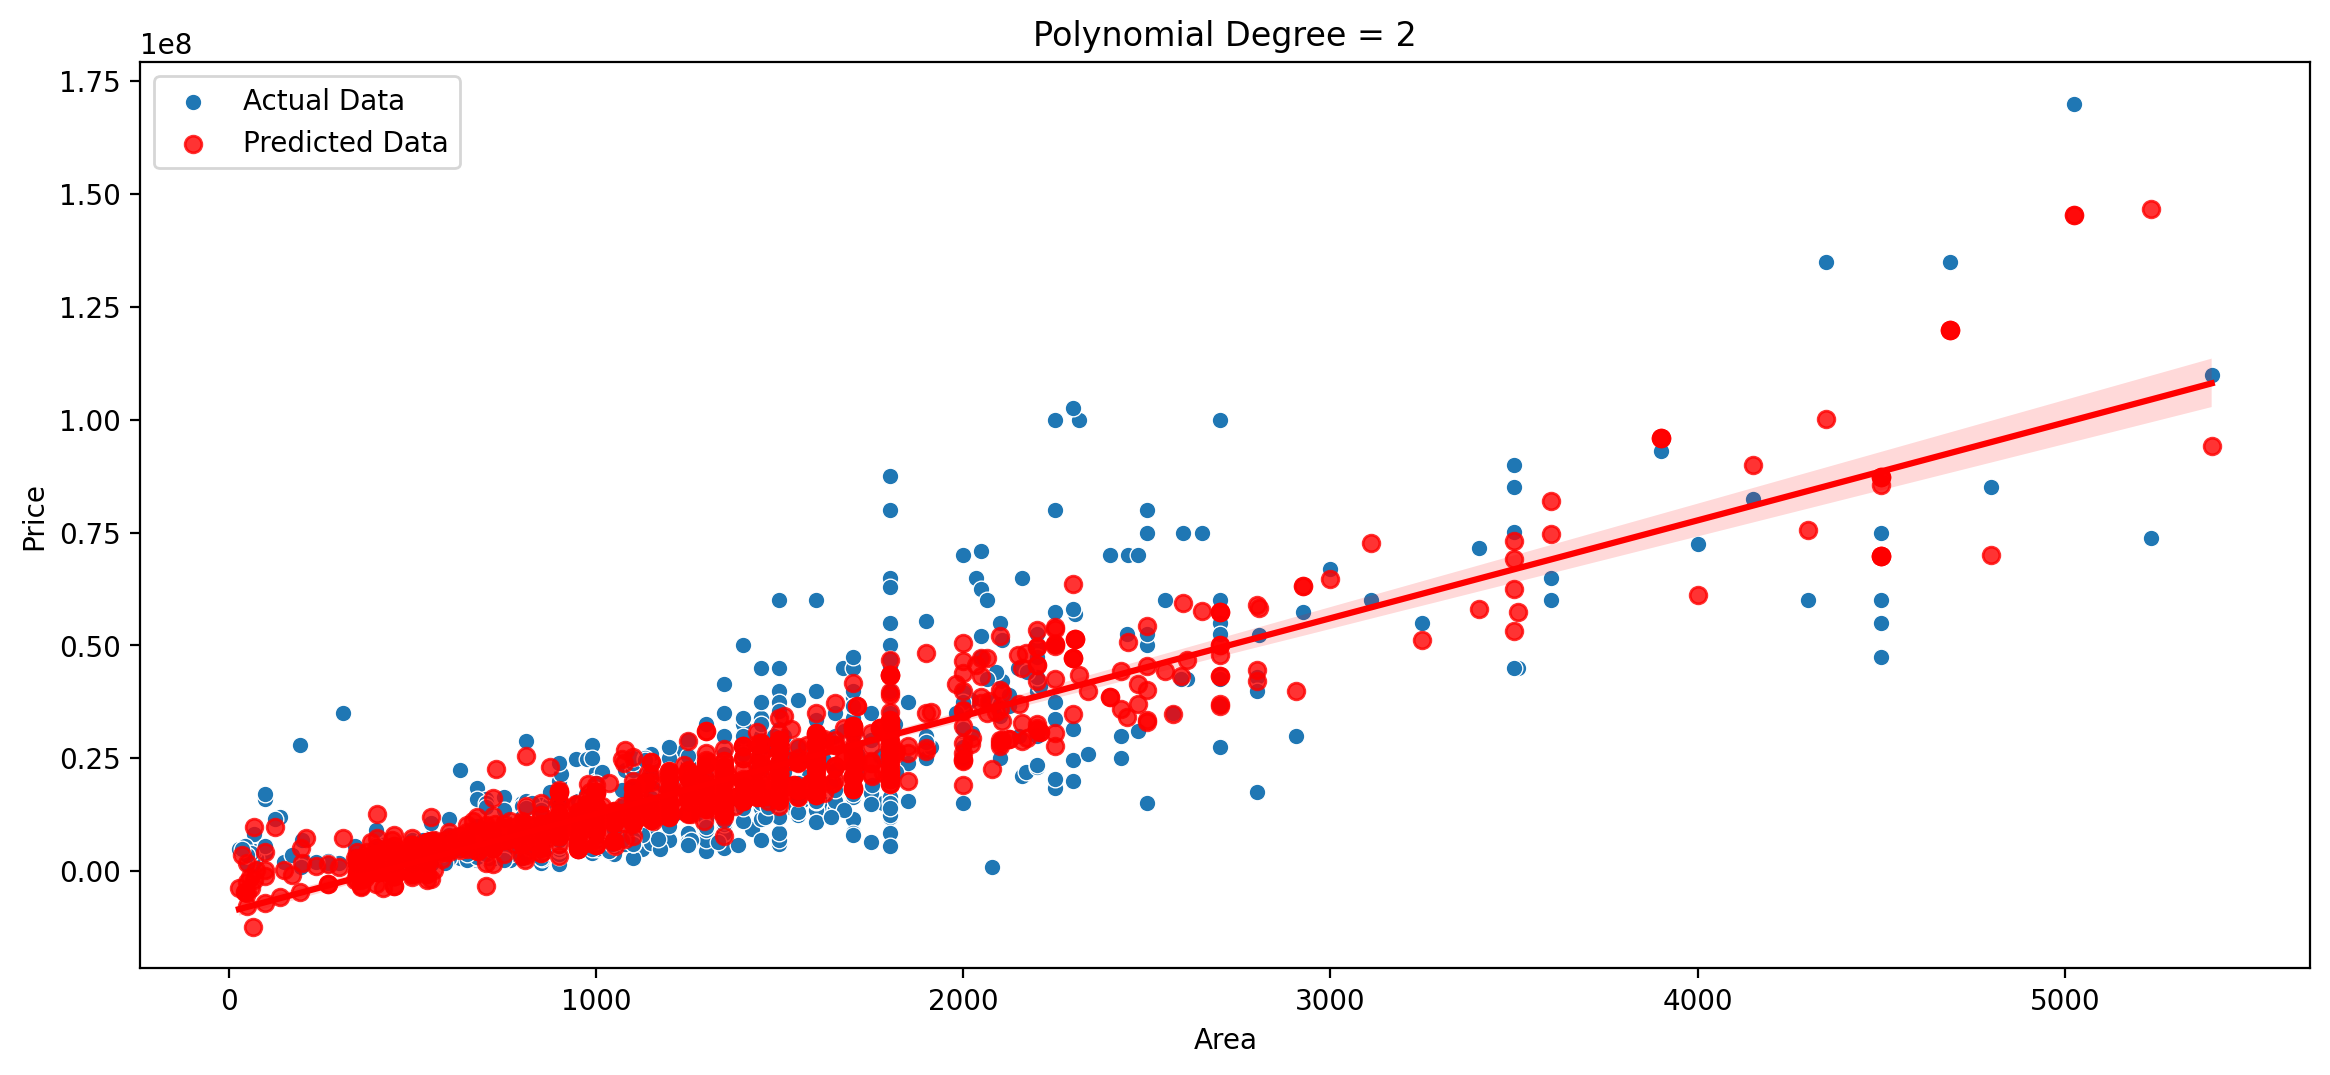

In [220]:
plt.figure(figsize=(14,6),dpi=200)
sns.scatterplot(x=dff['Area'],y=dff['Price'],label='Actual Data')
sns.regplot(x=dff['Area'],y=final_predictions,label='Predicted Data',color='r')
plt.title('Polynomial Degree = 2')
plt.legend()

the secound degree of polynomial working absolutely fine and giving best prediction despite there were some outliers

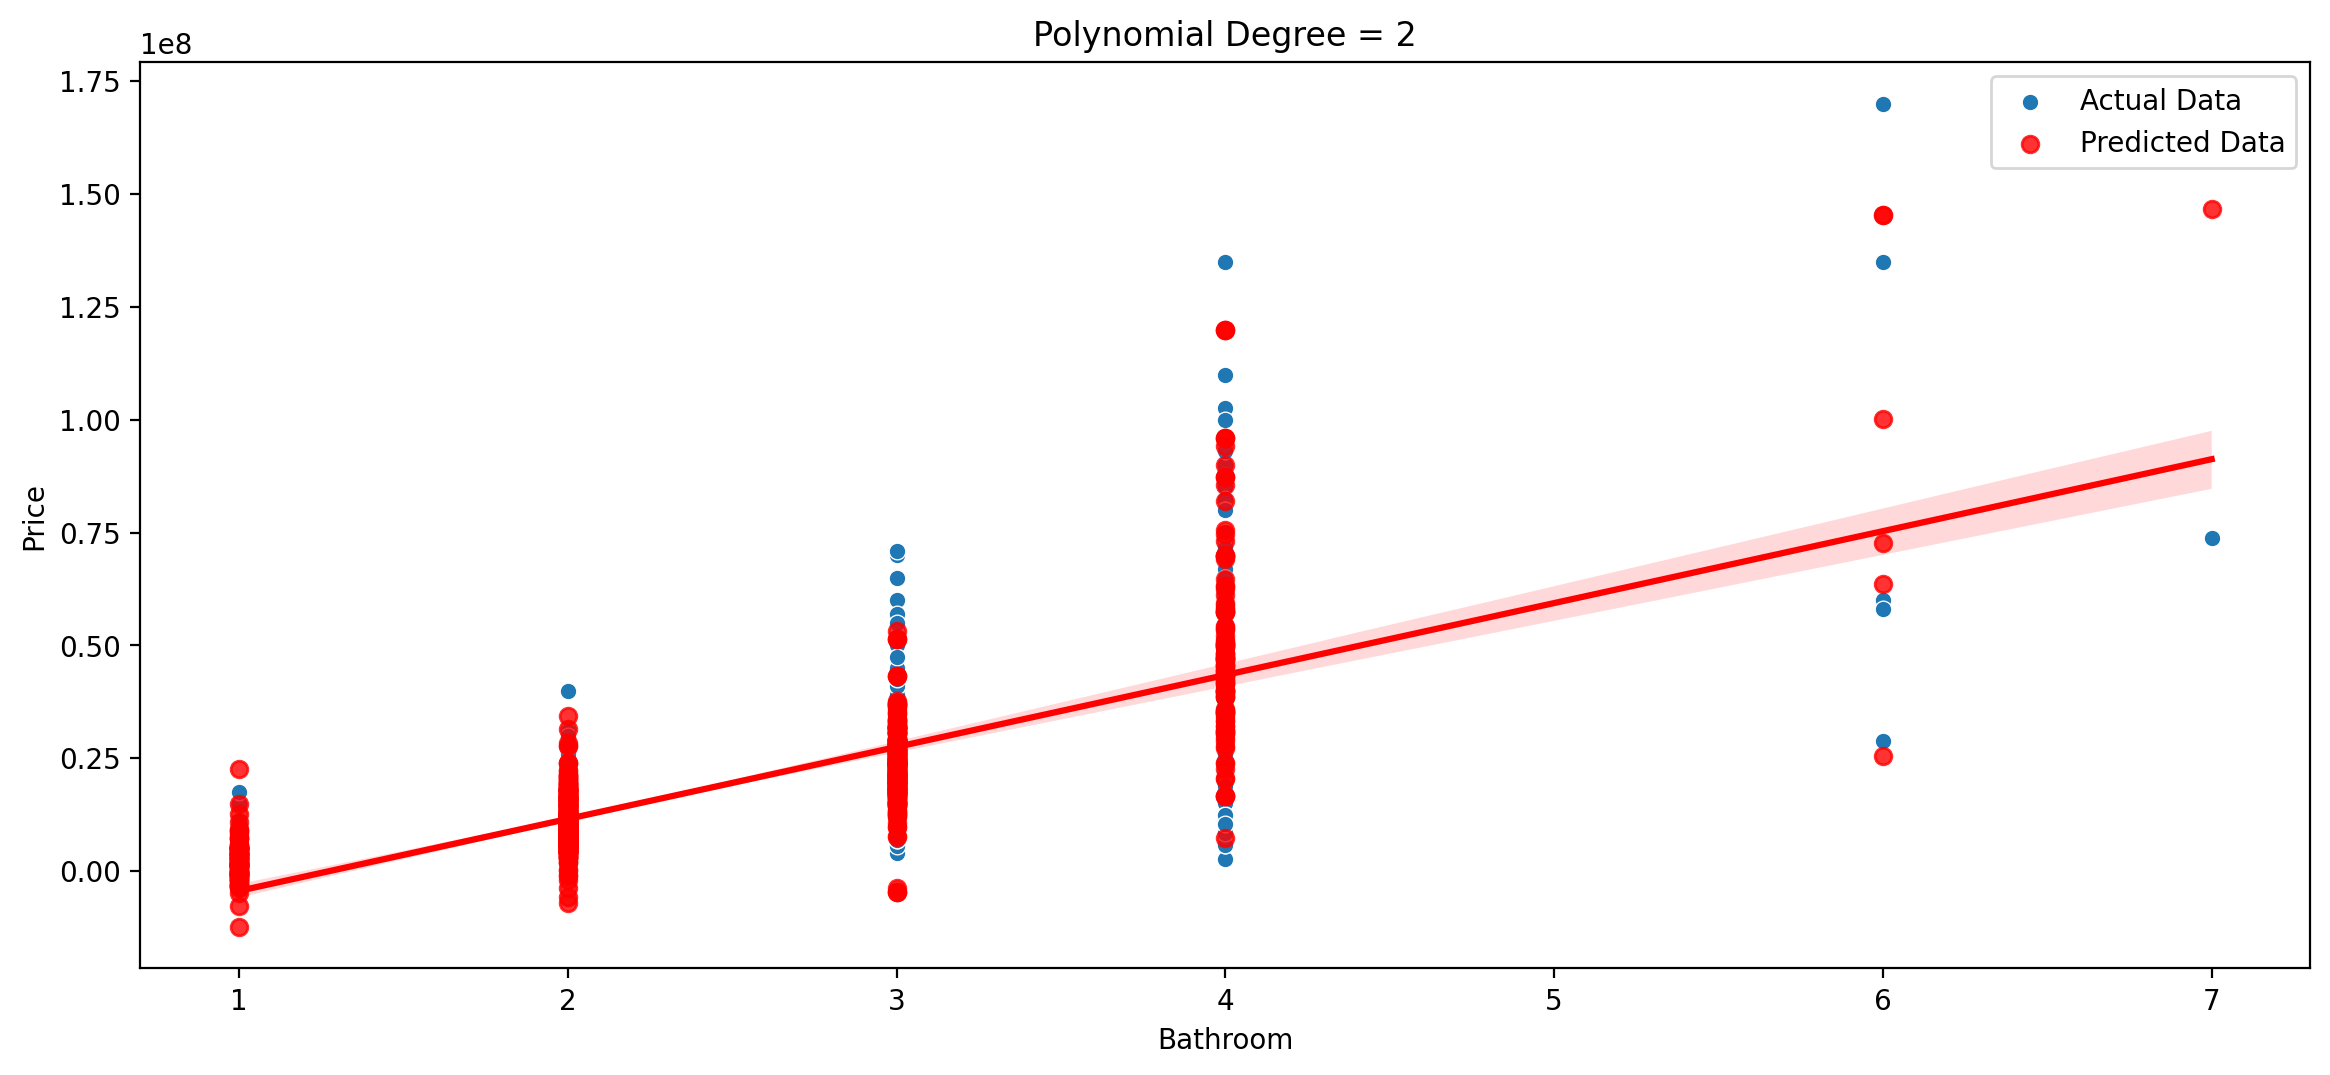

In [221]:
plt.figure(figsize=(14,6),dpi=200)
sns.scatterplot(x=dff['Bathroom'],y=dff['Price'],label='Actual Data')
sns.regplot(x=dff['Bathroom'],y=final_predictions,label='Predicted Data',color='r')
plt.title('Polynomial Degree = 2')
plt.legend()

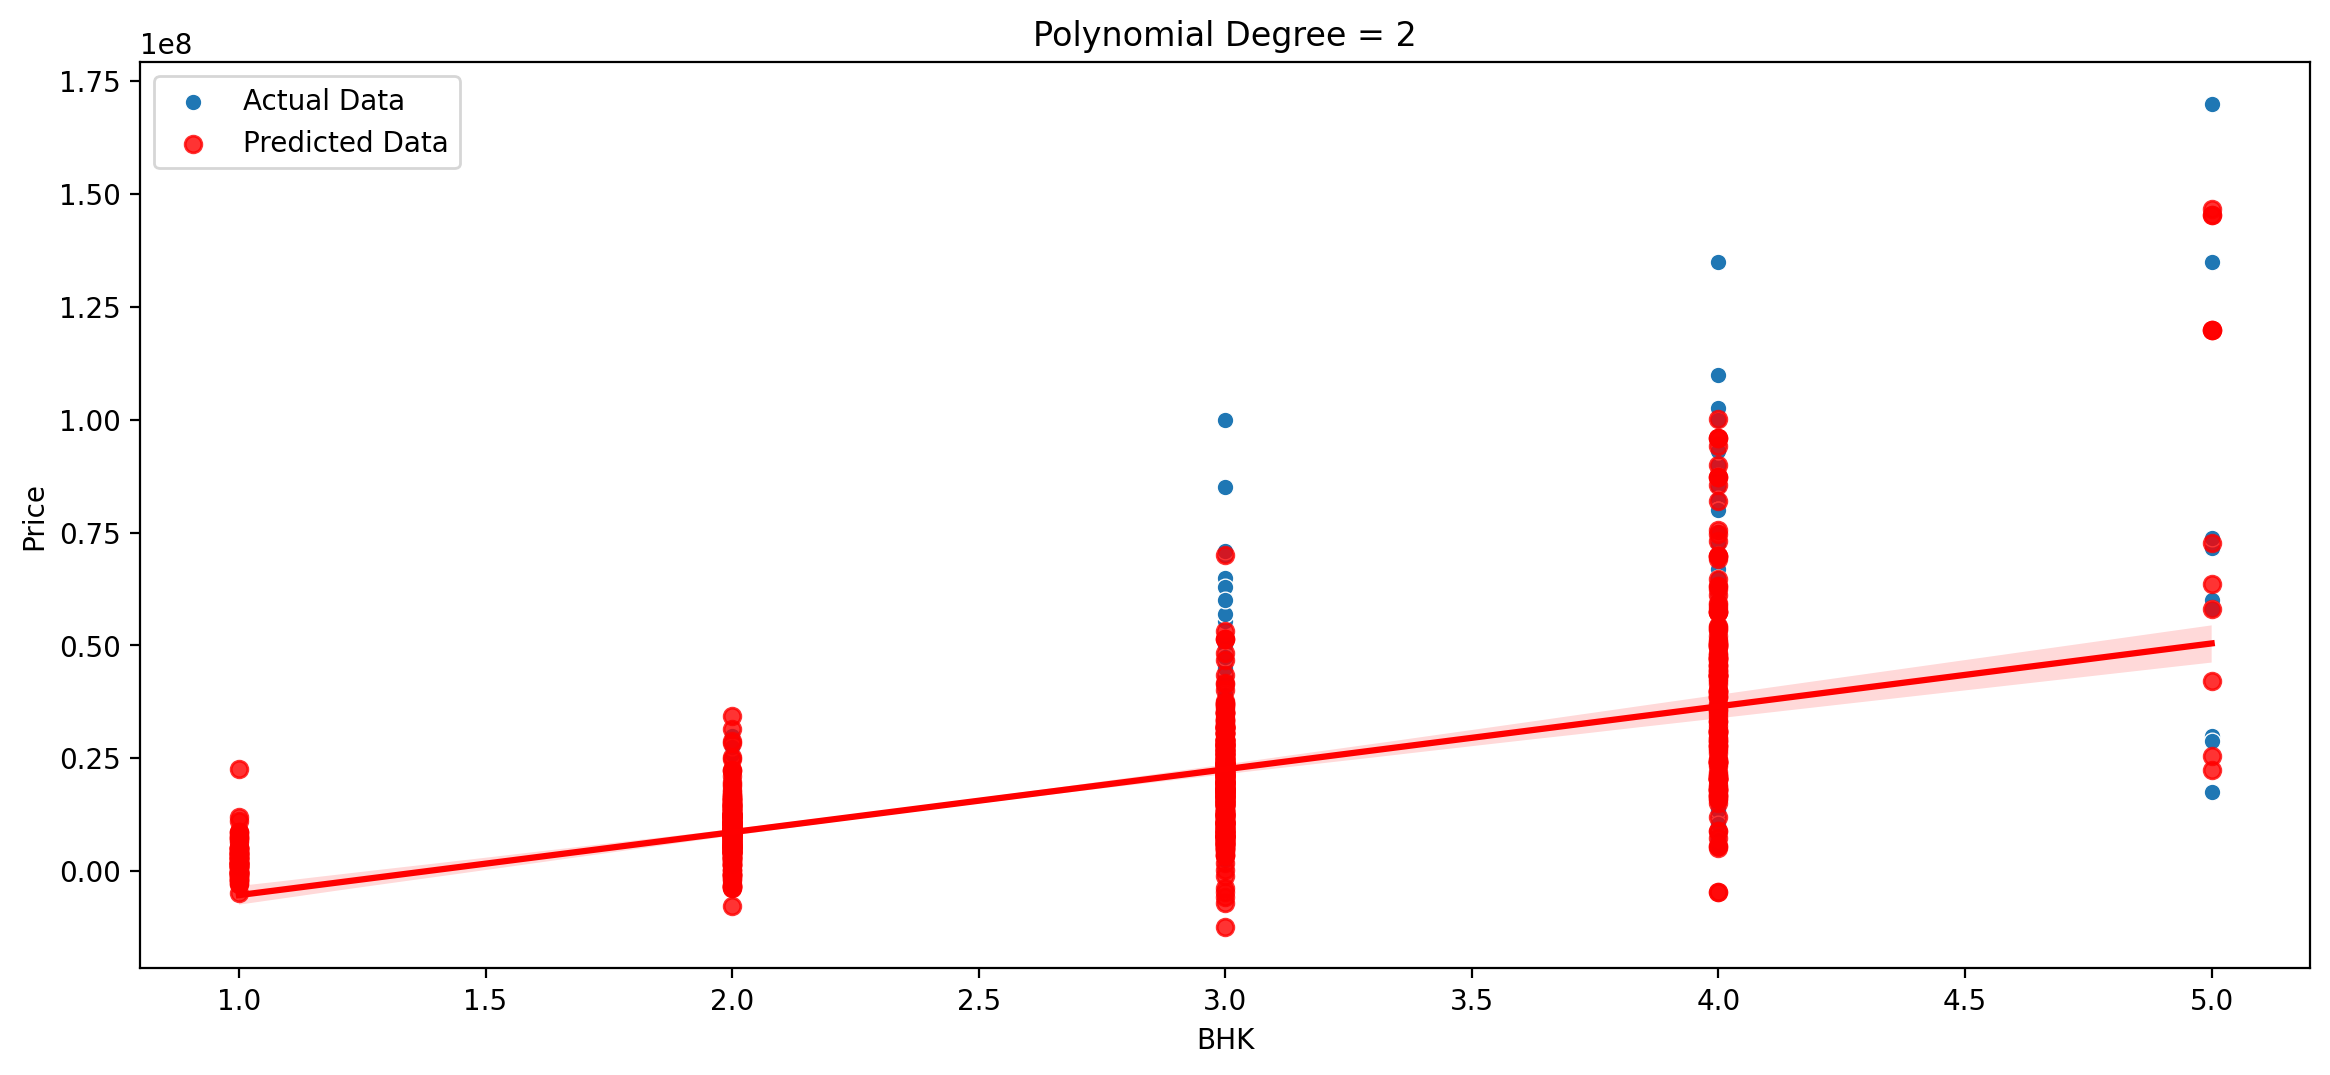

In [222]:
plt.figure(figsize=(14,6),dpi=200)
sns.scatterplot(x=dff['BHK'],y=dff['Price'],label='Actual Data')
sns.regplot(x=dff['BHK'],y=final_predictions,label='Predicted Data',color='r')
plt.title('Polynomial Degree = 2')
plt.legend()

In [235]:
dff['Predicted at poly degree 2'] = final_predictions

In [236]:
dff

,Furnishing_Semi-Furnished,Furnishing_Unfurnished,Status_Ready_to_move,Transaction_Resale,Type_Builder_Floor,Area,BHK,Bathroom,Parking,Price,Predicted at poly degree 2
0,1,0,1,0,1,800.0,3,2.0,1.0,6500000,6.325877e+06
1,1,0,1,0,0,750.0,2,2.0,1.0,5000000,7.399063e+06
2,0,0,1,1,0,950.0,2,2.0,1.0,15500000,1.316249e+07
3,1,0,1,1,1,600.0,2,2.0,1.0,4200000,5.363126e+06
4,1,0,1,0,1,650.0,2,2.0,1.0,6200000,8.034786e+06
...,...,...,...,...,...,...,...,...,...,...,...
1252,1,0,1,1,1,1800.0,3,3.0,1.0,26000000,2.491870e+07
1253,1,0,1,1,1,1200.0,3,3.0,1.0,16500000,1.821727e+07
1255,1,0,1,1,1,1050.0,3,2.0,3.0,12500000,1.341073e+07
1256,1,0,1,0,1,875.0,3,3.0,3.0,17500000,2.308996e+07


In [232]:
np.sqrt(mean_squared_error(y,final_predictions))  

9014009.413637744

In [233]:
dff['Price'].mean()

18387956.52173913

In [237]:
print('Accuracy',np.round(r2_score(y,final_predictions)*100,2),'%')

Accuracy 79.06 %


##### we did have only three high correleted fetures on that we are getting 79.06 % prediction accuracy 

# Model deployment 

In [68]:
from joblib import dump,load

In [69]:
dump(model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [70]:
dump(poly_converter,'final_poly_converter.joblib')

['final_poly_converter.joblib']

# Thank you

# Linkdin

https://www.linkedin.com/in/siddharth-chikalkar-7244141b0/

# Mail

siddharthchikalkar5982@gmail.com